# Crash Course in Causality Crash Course in Causality Written Section

Let us understand what is causalilty in Data Science!!

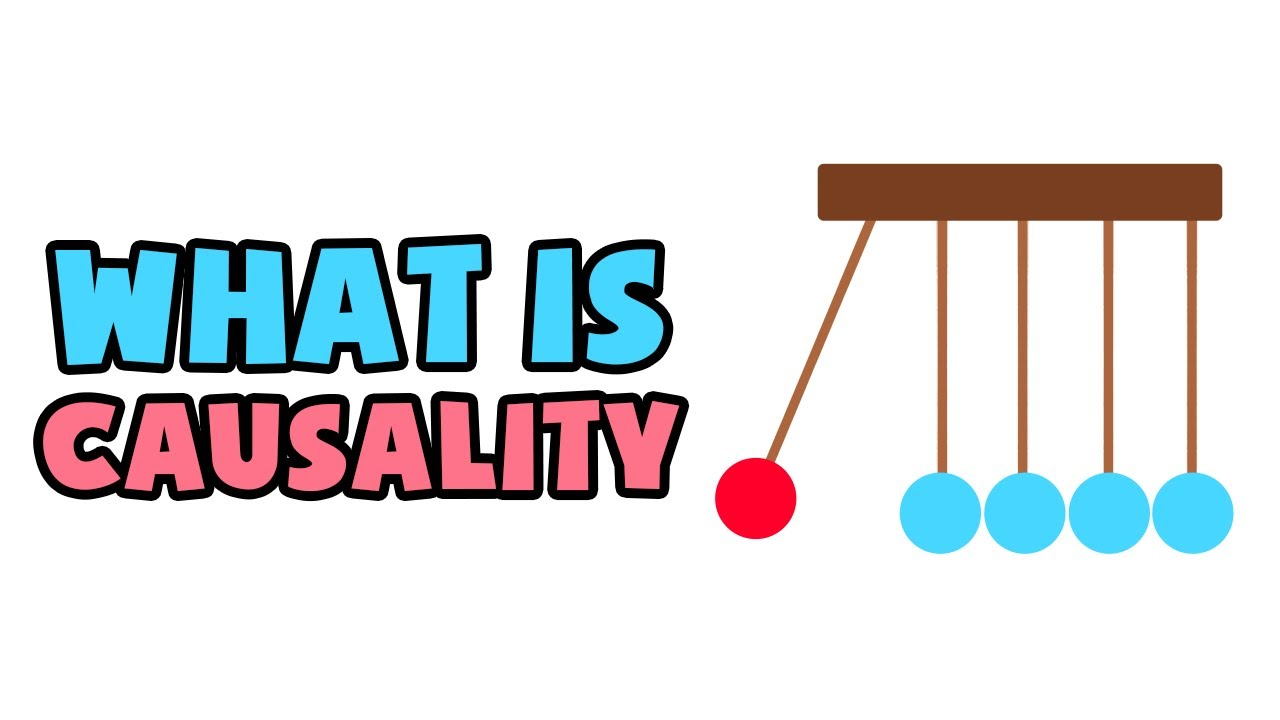

Causality refers to the relationship between cause and effect, where one event (the cause) brings about another event (the effect). Understanding causality is fundamental in various fields, including data science, as it allows us to make informed decisions, predict outcomes, and intervene to achieve desired results.


### **Key Concepts in Causality**:

Correlation vs. Causation: It's essential to distinguish between correlation, which describes a statistical relationship between two variables, and causation, which implies that changes in one variable directly influence changes in another. While correlation can suggest a potential relationship, it does not prove causation.

Counterfactuals: Causal inference often involves comparing what actually happened with what would have happened under different conditions (counterfactuals). This approach helps us identify the causal effect of a particular intervention or treatment.

Confounding Variables: Confounding variables are extraneous factors that may influence both the cause and the effect, leading to spurious correlations or incorrect causal inferences. Identifying and accounting for confounding variables is crucial for accurate causal inference.

Randomized Controlled Trials (RCTs): RCTs are considered the gold standard for establishing causality in experimental settings. In an RCT, participants are randomly assigned to treatment and control groups, allowing researchers to assess the causal effect of an intervention while controlling for confounding factors.

Observational Studies: In observational studies, researchers observe the relationship between variables without intervening or manipulating them. While observational studies can provide valuable insights, they are prone to confounding and may require advanced statistical techniques for causal inference.

### **Applications of Causality in Data Science:**

Predictive Modeling: Understanding causal relationships helps improve the accuracy and interpretability of predictive models by identifying key drivers and factors influencing outcomes.

Policy Evaluation: Causal inference techniques are used to evaluate the effectiveness of policies, interventions, and treatments by assessing their causal impact on outcomes of interest.

Personalization: Causal inference enables personalized recommendations and interventions by identifying the causal effects of different treatments or actions for individuals or groups.

Causal Discovery: Data-driven methods for causal discovery aim to uncover causal relationships from observational data, providing insights into complex systems and phenomena.

**We will be working on an example to understand Causal Inference**


# Worked Example1: Weather in Causal Inference  

This Jupyter notebook aims to explore causal inference within weather data, with a specific focus on predicting rainfall. Understanding causality goes beyond simple correlation, enabling us to uncover if and how certain weather conditions lead to rain. We'll use various causal inference techniques to investigate our dataset.


In [186]:
# Python code cell for setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting visualization settings for a better view
%matplotlib inline
sns.set(style="whitegrid")

# Loading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/CSV/Weather.csv')

data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]


## Causality Basics

Causal inference helps us understand whether a relationship between two variables is causal or merely correlational. Unlike correlation, causation indicates that changes in one variable directly result in changes in another. This section discusses key concepts such as confounding variables, causality tests, and how they apply to weather prediction.

Based on the columns from dataset, here's a brief description of each column:

- **MinTemp**: The minimum temperature recorded for the day, usually measured in degrees Celsius.
- **MaxTemp**: The maximum temperature recorded for the day, also in degrees Celsius.
- **Rainfall**: The amount of rainfall recorded for the day, typically measured in millimeters.
- **Evaporation**: The amount of water evaporated from the surface, measured in millimeters.
- **Sunshine**: The number of hours of bright sunlight received during the day.
- **WindGustDir**: The direction from which the strongest wind gust was recorded for the day.
- **WindGustSpeed**: The speed of the strongest wind gust, usually measured in kilometers per hour.
- **WindDir9am**: The wind direction recorded at 9 AM.
- **WindDir3pm**: The wind direction recorded at 3 PM.
- **WindSpeed9am**: The wind speed recorded at 9 AM, measured in kilometers per hour.
- **WindSpeed3pm**: The wind speed recorded at 3 PM, also in kilometers per hour.
- **Humidity9am**: The percentage of humidity in the air at 9 AM.
- **Humidity3pm**: The percentage of humidity in the air at 3 PM.
- **Pressure9am**: The atmospheric pressure at 9 AM, measured in hectopascals.
- **Pressure3pm**: The atmospheric pressure at 3 PM, also in hectopascals.
- **Cloud9am**: The amount of sky covered by clouds at 9 AM, typically recorded on an eight-point scale.
- **Cloud3pm**: The amount of sky covered by clouds at 3 PM, also on an eight-point scale.
- **Temp9am**: The temperature recorded at 9 AM, measured in degrees Celsius.
- **Temp3pm**: The temperature recorded at 3 PM, also in degrees Celsius.
- **RainToday**: A binary or categorical indicator of whether it rained today (Yes or No).
- **RISK_MM**: The amount of rainfall in millimeters for the next day. This can be used for model training but should be used carefully to avoid data leakage.
- **RainTomorrow**: A binary or categorical indicator of whether it will rain tomorrow (Yes or No), which is the target variable for prediction models.

These descriptions give an overview of each feature in your dataset. When analyzing the data, consider the role each feature may play in predicting rainfall, along with potential interactions between variables.

To understand causality in weather prediction, specifically predicting rain tomorrow, we can analyze how various weather conditions (predictor variables) influence the likelihood of rainfall (outcome variable). Here are simplified notes on using the dataset columns for causal analysis:

1. **Target Variable**: `RainTomorrow` is our outcome of interest, indicating whether it will rain the next day.

2. **Predictor Variables**:
   - **Temperature (MinTemp, MaxTemp, Temp9am, Temp3pm)**: Analyze how extreme temperatures or sudden changes might affect rain occurrence.
   - **Rainfall & RainToday**: Past rainfall data can help identify patterns or conditions leading to consecutive rainy days.
   - **Evaporation**: Higher evaporation rates might influence humidity and cloud formation, potentially affecting rain patterns.
   - **Sunshine**: Less sunshine could be associated with increased cloud cover, possibly leading to rain.
   - **Wind (WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm)**: Wind patterns and speed might correlate with storm movement and rain.
   - **Humidity (Humidity9am, Humidity3pm)**: Higher humidity levels could indicate more moisture in the air, a key factor for rain.
   - **Pressure (Pressure9am, Pressure3pm)**: Low pressure often precedes stormy weather, which could indicate rain.
   - **Cloud Cover (Cloud9am, Cloud3pm)**: More cloud cover could be a direct indicator of rain potential.
   - **Evaporation & Sunshine**: These factors affect moisture and heat in the atmosphere, influencing rain formation.

3. **Causal Inference Techniques**:
   - **Observational Study**: Since we can't manipulate weather conditions, we rely on observational data, analyzing how changes in predictors are associated with rain tomorrow.
   - **Confounding Variables**: Identify and adjust for variables that could influence both the predictors and the outcome, such as seasonal changes.
   - **Propensity Score Matching**: Could be used to match days with similar conditions (e.g., temperature, pressure) but different rainfall outcomes to isolate the effect of specific variables.

4. **Analysis Strategy**:
   - **Correlation vs. Causation**: Start by identifying correlations between predictors and rain tomorrow. Then, delve deeper into causality, questioning if and how a predictor causes the outcome.
   - **Temporal Analysis**: Use time-series data (like RISK_MM and sequential daily records) to analyze causality based on time-lagged effects.

These notes form a preliminary guide for using the dataset to understand causal relationships in weather prediction. The goal is to move beyond finding patterns to understanding why certain weather conditions lead to rain, supporting more accurate and insightful weather forecasts.


# Exploratory Data Analysis

In [149]:
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 366 rows and 22 columns.


In [150]:
# Check data types
print(data.dtypes)

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object


In [151]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64


In [152]:
# Percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)

Percentage of missing values in each column:
 MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.819672
WindGustDir      0.819672
WindGustSpeed    0.546448
WindDir9am       8.469945
WindDir3pm       0.273224
WindSpeed9am     1.912568
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          0.000000
RainTomorrow     0.000000
dtype: float64


Based on the provided percentages of missing values in each column of your dataset, here are some inferences and recommendations:

1. **Minor Missing Values in Most Variables**: Most variables like `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am`, `Temp3pm`, `RainToday`, `RISK_MM`, and `RainTomorrow` have no missing values. This suggests that the dataset is relatively complete for these variables, which is beneficial for a robust analysis.

2. **Moderate Missing Values in Wind Direction and Speed**: Variables related to wind direction (`WindDir9am`, `WindDir3pm`) and wind speed (`WindSpeed9am`, `WindGustSpeed`) have a moderate percentage of missing values, with `WindDir9am` having the highest at approximately 8.47%. This may require imputation or other data cleaning techniques, especially if these variables are critical for your analysis or model.

3. **Low Missing Values in Sunshine, WindGustDir, and WindGustSpeed**: `Sunshine`, `WindGustDir`, and `WindGustSpeed` have less than 1% missing values, which is relatively minor. Simple imputation methods (e.g., median or mode substitution) could be sufficient to handle these missing values without significantly affecting the dataset's integrity.

4. **Data Imputation Strategy**: Given the relatively low percentage of missing values for most variables, implementing a data imputation strategy could be a practical approach to maintain the dataset's size and quality. For categorical variables like `WindGustDir`, `WindDir9am`, and `WindDir3pm`, mode imputation or predictive modeling techniques could be used. For numerical variables like `WindGustSpeed` and `Sunshine`, median or mean imputation might be appropriate, considering the distribution of these variables.

Overall, the dataset appears to be in good shape for conducting detailed analyses, with specific attention needed for handling missing data in wind-related variables to ensure the integrity and reliability of any causal inferences or predictive models developed from this data.

In [153]:
# Descriptive statistics for numerical features
print(data.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

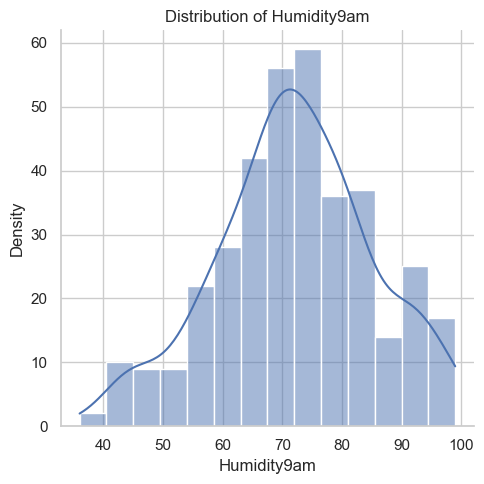

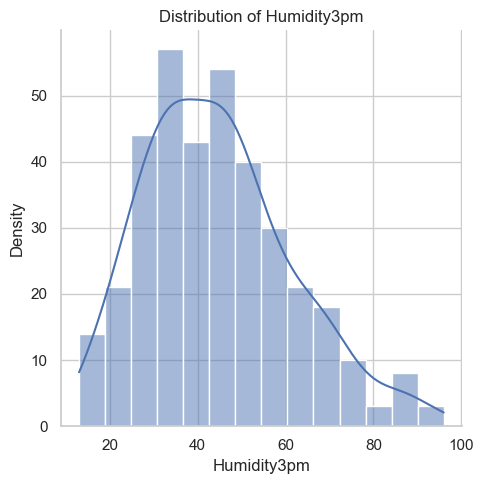

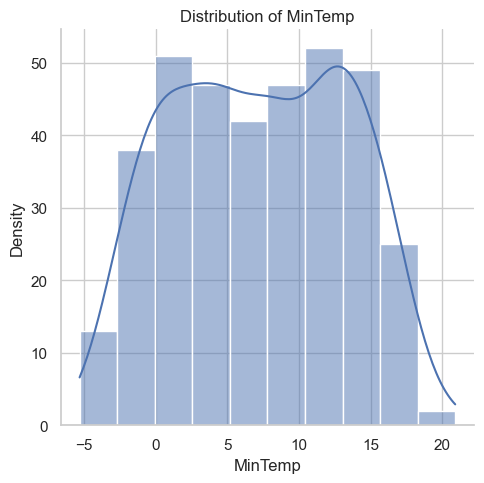

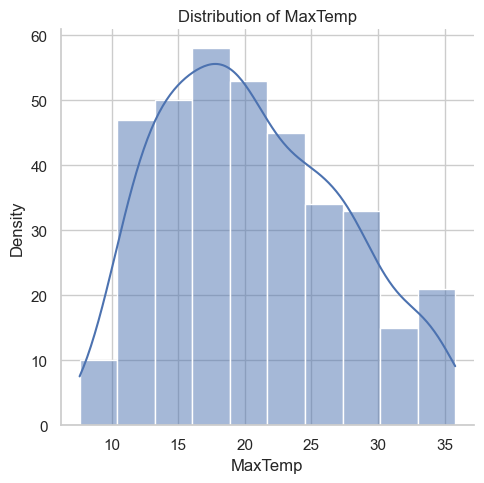

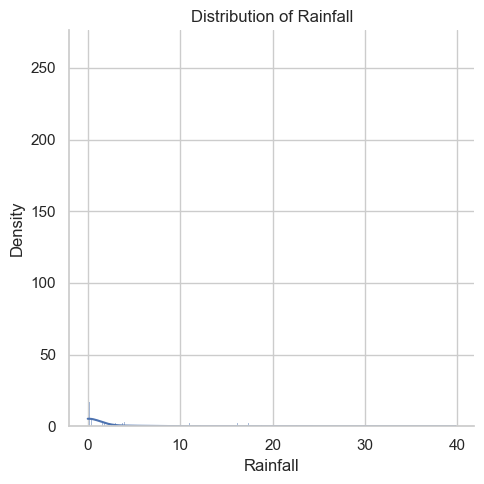

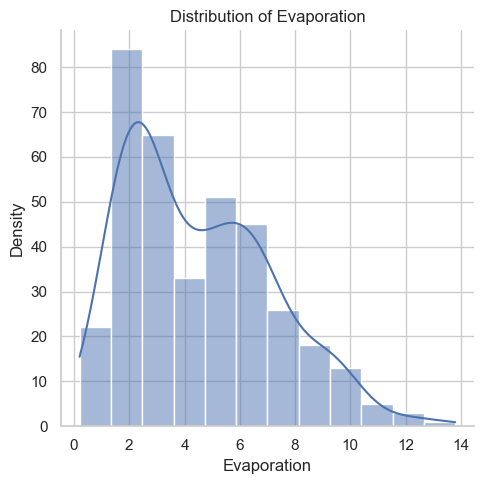

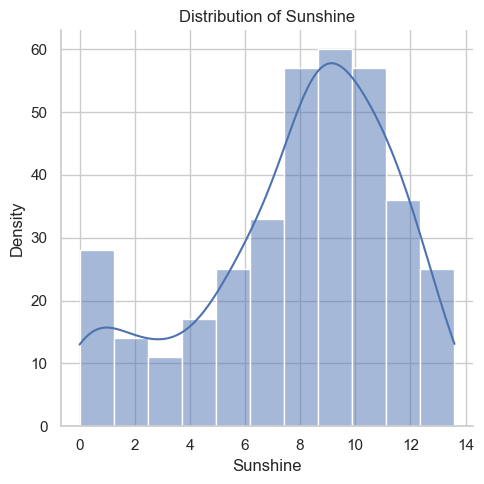

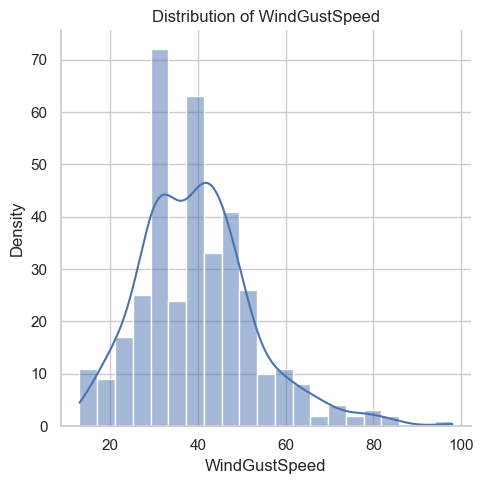

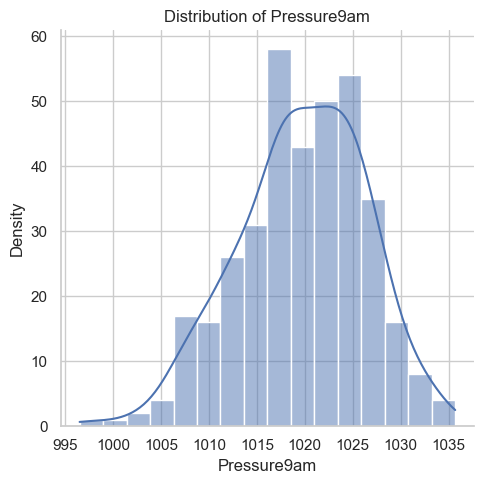

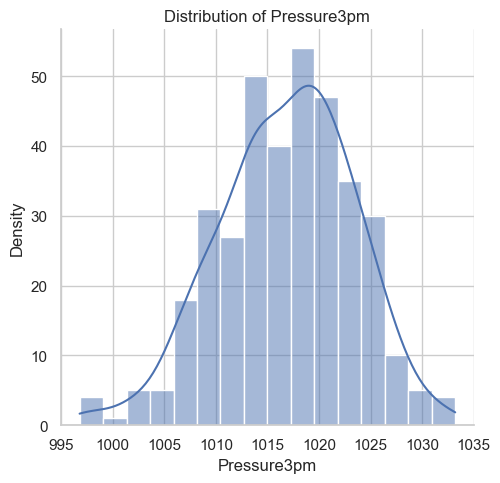

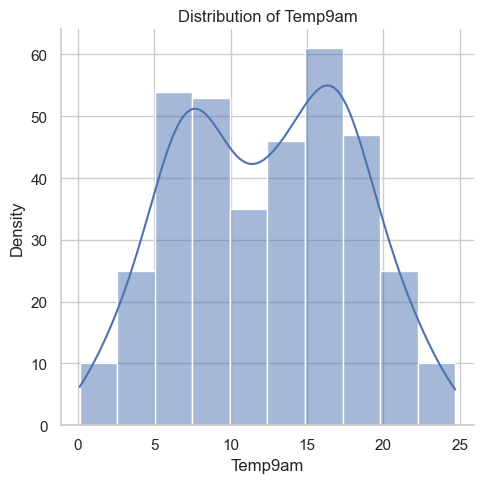

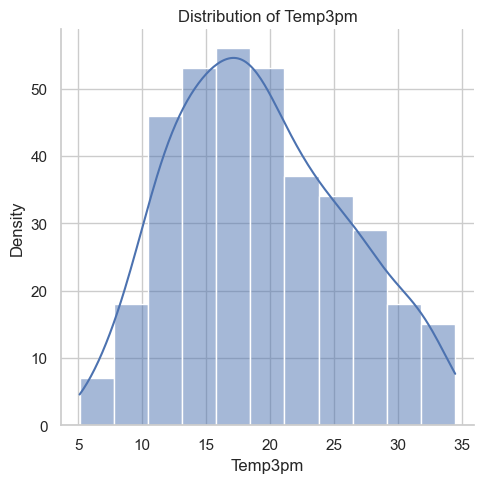

In [155]:
# Histograms for distribution of key numerical features with density plots
numerical_columns = ['Humidity9am',  'Humidity3pm', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

for column in numerical_columns:
    sns.displot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

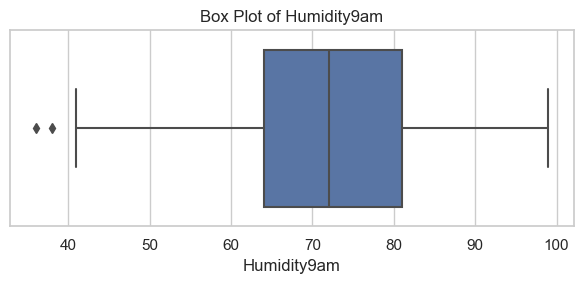

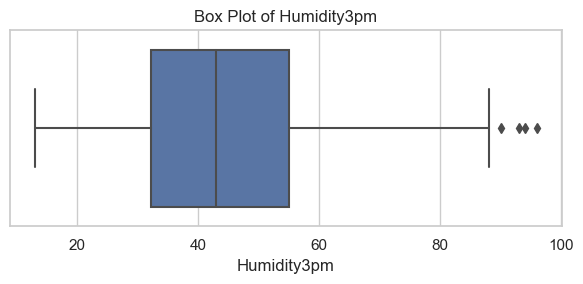

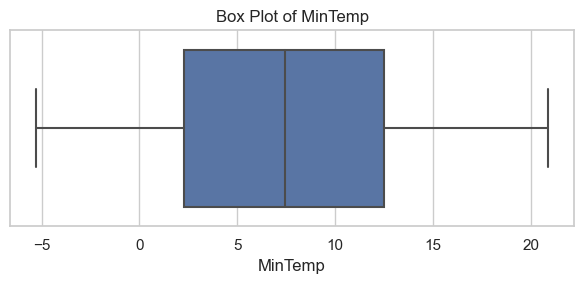

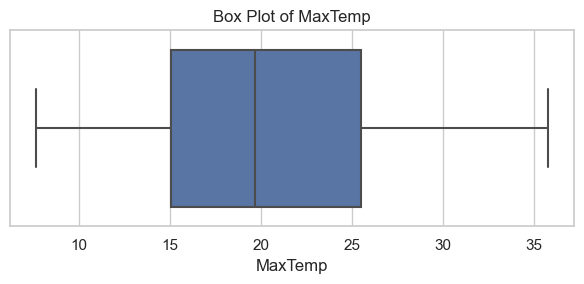

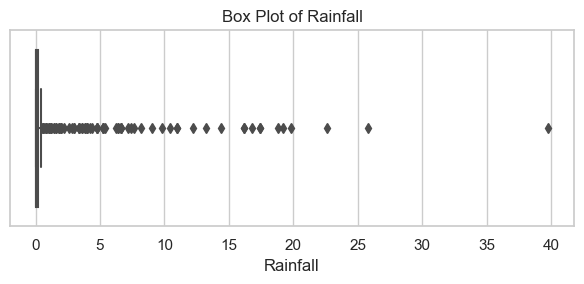

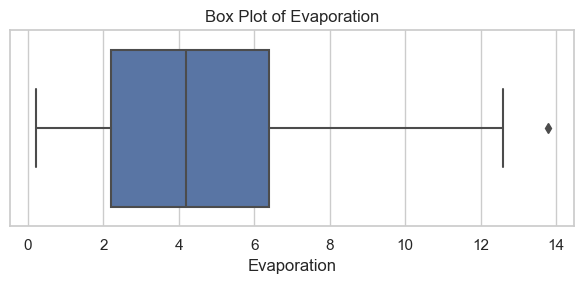

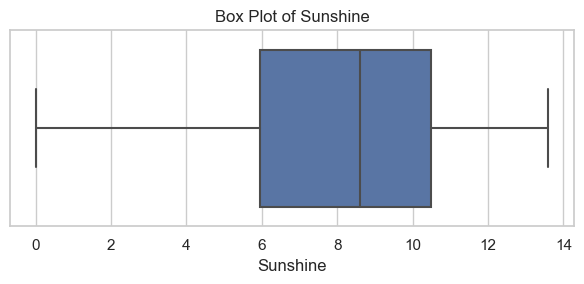

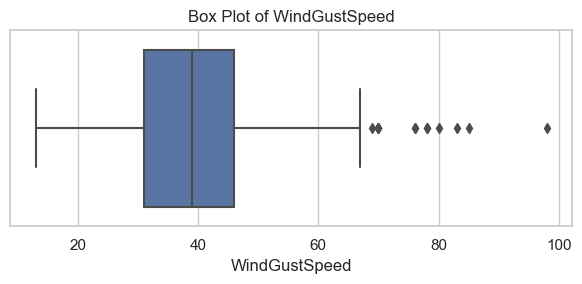

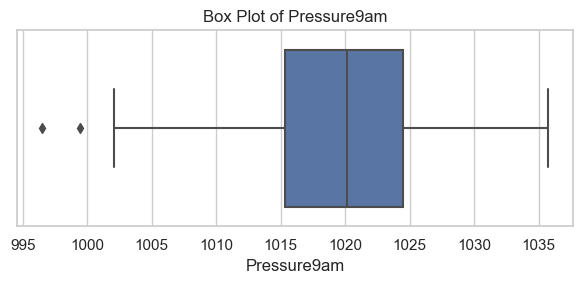

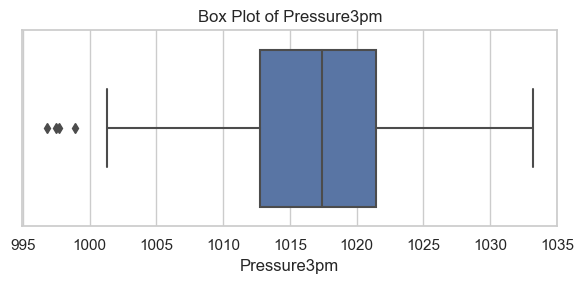

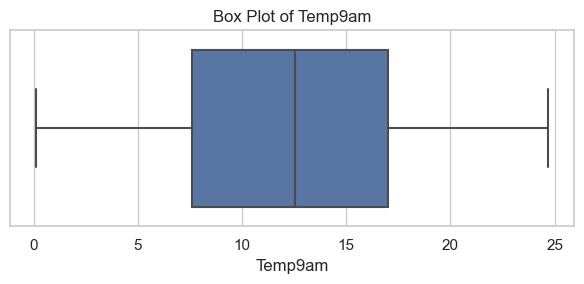

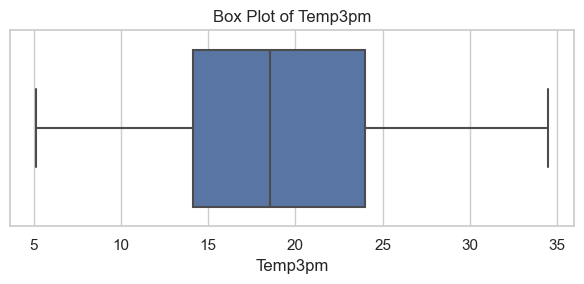

In [156]:
for column in numerical_columns:
    plt.figure(figsize=(6, 3))  # Adjust figure size for better visibility
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

From the box plots provided for `Rainfall`, `WindGustSpeed`, and `Pressure3pm`, we can make the following inferences:

1. **Rainfall**:
   - The distribution of rainfall is highly skewed to the right, indicating that most days have low rainfall amounts, while a small number of days have very high rainfall.
   - There are several outliers visible, suggesting occasional extreme rainfall events.
   - The median rainfall is close to 0, reinforcing that most days do not experience significant rainfall.

2. **WindGustSpeed**:
   - The distribution of wind gust speeds appears to be somewhat symmetrical, with a slight right skew.
   - The median wind gust speed is between 40 and 50 km/h.
   - There are outliers on the higher end, which could indicate occasional days with extremely high wind speeds, possibly associated with storm events.

3. **Pressure3pm**:
   - The pressure at 3pm tends to be normally distributed, suggesting a stable climatic condition in the region where the data was collected.
   - The median pressure is around 1015 hPa, which is typical for many regions.
   - There are a few outliers on the lower end, which might be associated with low-pressure systems often related to stormy weather.

These inferences can help in understanding weather patterns and preparing data for further analysis, such as identifying potential predictors for rainfall. For instance, the outliers in the `Rainfall` and `WindGustSpeed` could be particularly interesting for investigating days with extreme weather conditions and their causes. Additionally, the stability of `Pressure3pm` could be a useful baseline feature for forecasting normal versus abnormal weather conditions.

### Correlation Analysis
Understanding the relationships between numerical variables is crucial. A heatmap of correlations can highlight potential predictors for RainTomorrow and relationships worth exploring further.

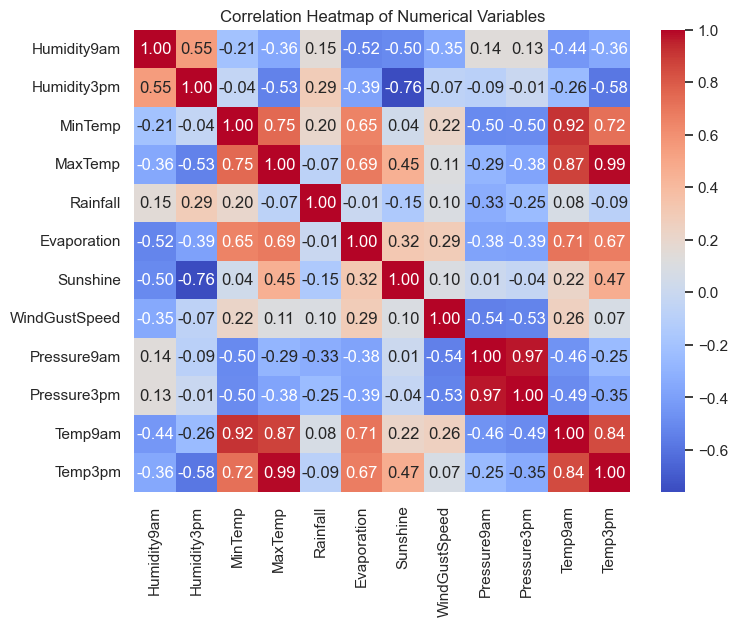

In [157]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


The provided correlation heatmap displays the strength and direction of the linear relationship between pairs of numerical variables. Here are some inferences drawn from the heatmap:

1. **High Positive Correlation Between Temperatures**: There's a very high positive correlation between `MinTemp` and `MaxTemp` (0.99), and between `Temp9am` and `Temp3pm` (0.84), which suggests that days starting off warmer (or cooler) tend to end the same way.

2. **Negative Correlation Between Temperature and Pressure**: Both `MinTemp` and `MaxTemp` show a negative correlation with `Pressure9am` and `Pressure3pm` (around -0.50), indicating that higher temperatures are typically associated with lower atmospheric pressures.

3. **Weak Relationships with Rainfall**: `Rainfall` seems to have only weak correlations with other variables, the highest being with `Evaporation` (0.10), which implies that daily rainfall amounts don't strongly correlate with daily readings of temperature, pressure, or wind speed.

4. **Pressure Variables Correlation**: There's a high positive correlation between `Pressure9am` and `Pressure3pm` (0.97), suggesting that pressure readings are quite stable throughout the day.

5. **Wind Gust Speed**: `WindGustSpeed` does not show a strong correlation with any other variables (highest at 0.29 with `Evaporation`), indicating that gust speeds are relatively independent of the other factors measured in this dataset.

6. **Temperature and Evaporation**: Both `MinTemp` and `MaxTemp` have a moderate positive correlation with `Evaporation` (around 0.65 and 0.69, respectively), which is expected as higher temperatures can lead to increased evaporation rates.

These insights can guide further investigation into specific relationships and contribute to developing more nuanced predictive models. For instance, understanding the relationship between temperature and pressure could be critical in weather prediction models. However, it's important to note that correlation does not imply causation, and further analysis would be required to identify causal relationships.

## Categorical Variables Analysis
For categorical variables, explore the distribution and relationship with the target variable (RainTomorrow). Pie charts or bar graphs can illustrate the proportion of categories, and count plots can help visualize their relationship with RainTomorrow.

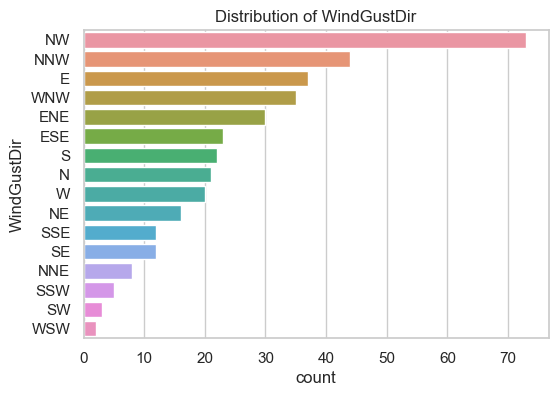

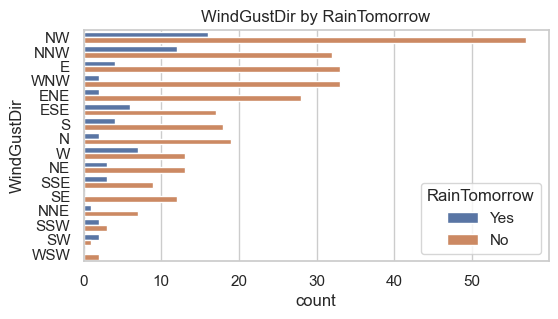

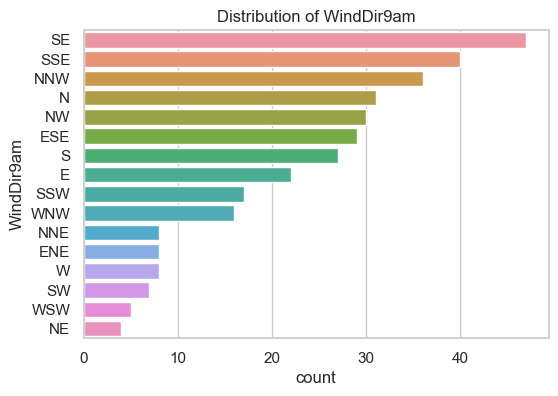

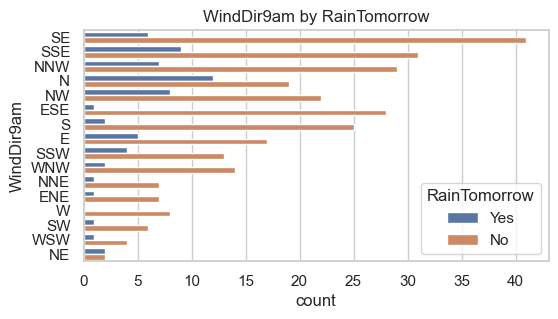

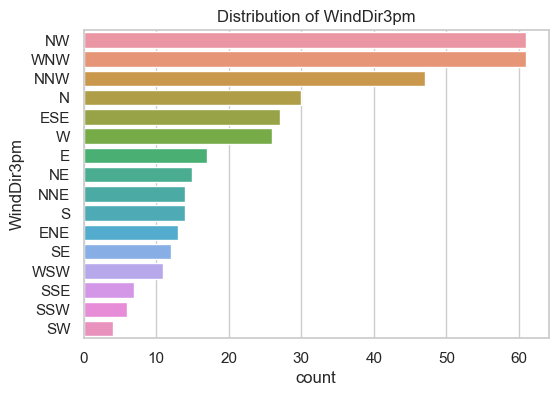

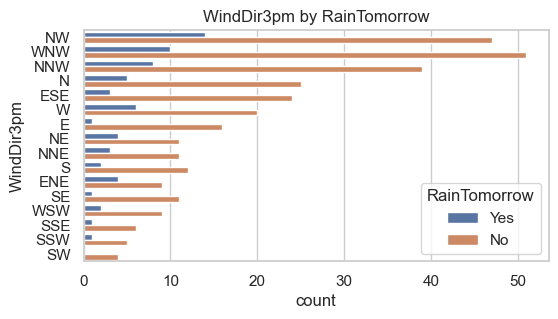

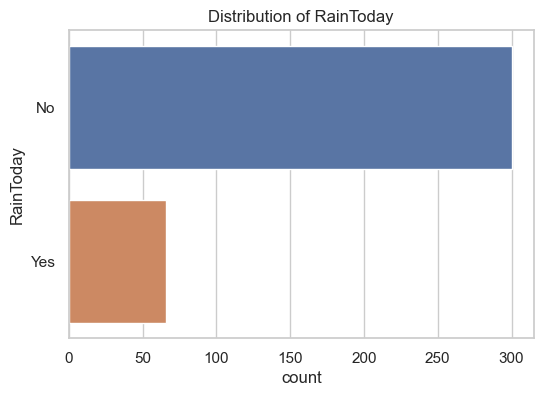

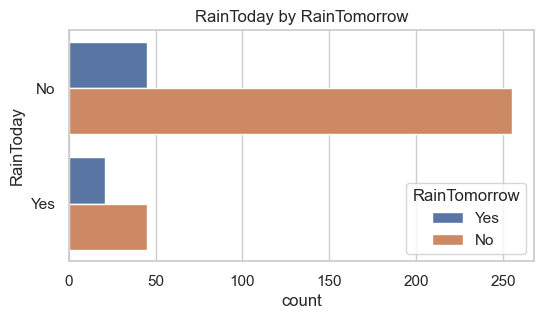

In [158]:
# Count plots for categorical variables
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()

    # Relationship with RainTomorrow
    plt.figure(figsize=(6, 3))
    sns.countplot(y=column, hue='RainTomorrow', data=data, order = data[column].value_counts().index)
    plt.title(f'{column} by RainTomorrow')
    plt.show()


**Inference from WindGustDir by RainTomorrow**:
The wind gust direction does not appear to have a strong singular influence on whether it rains the next day, as the counts for rain versus no rain are relatively similar across all directions.
However, it seems like certain directions like N, NNW, and NW have a slightly higher count for days followed by rain.

**Inference from WindDir9am by RainTomorrow**:
Similar to wind gust directions, the wind direction at 9 am does not show a strong preference for influencing rain on the next day.
There is a noticeable count of days where winds from the SE are followed by rain compared to no rain.

**Inference from WindDir3pm by RainTomorrow**:
Again, the pattern is similar to the 9 am wind direction, with no strong influence discernible for a particular wind direction leading to rain the following day.
The counts for certain directions such as S, SE, and ESE show a slightly higher presence on days leading to rain, but the differences are not substantial.

There is a noticeable difference in **the occurrence of rain the following day based on whether it rained today**.
On days when it did not rain today (No), the count of days without rain tomorrow (No) is substantially higher than the days with rain tomorrow (Yes).
Conversely, on days when it rained today (Yes), there is an increase in the frequency of rain the following day (Yes), although the count is lower than the days when it does not rain today (No).
This visual suggests a potential association between rain on consecutive days. If it rains today, it seems more likely to rain tomorrow compared to a day that started with no rain.

## Causal Inference by LiNGAM


LiNGAM (Linear Non-Gaussian Acyclic Model) is a causal discovery algorithm developed to identify the causal structure among multiple variables. Unlike other statistical methods that often only reveal correlational relationships, LiNGAM is designed to uncover the underlying causal ordering of the variables based on non-Gaussian data distributions.

In [159]:
from IPython.display import Image
import category_encoders as ce

import graphviz
import lingam
from lingam.utils import make_dot, make_prior_knowledge

In [160]:
data.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [161]:
df1 = data.dropna(how='any')

In [162]:
df1.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [163]:
display(pd.DataFrame(df1.isnull().sum()).T)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        0        0         0            0         0            0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0              0           0           0             0  ...            0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            0            0         0         0        0        0          0   

   RISK_MM  RainTomorrow  
0        0             0  

[1 rows x 22 columns]

In [164]:
oe = ce.ordinal.OrdinalEncoder(
    cols=df1.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df1)
n_variables = df_en.shape[1]

In [165]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

22
{'MinTemp': 0, 'MaxTemp': 1, 'Rainfall': 2, 'Evaporation': 3, 'Sunshine': 4, 'WindGustDir': 5, 'WindGustSpeed': 6, 'WindDir9am': 7, 'WindDir3pm': 8, 'WindSpeed9am': 9, 'WindSpeed3pm': 10, 'Humidity9am': 11, 'Humidity3pm': 12, 'Pressure9am': 13, 'Pressure3pm': 14, 'Cloud9am': 15, 'Cloud3pm': 16, 'Temp9am': 17, 'Temp3pm': 18, 'RainToday': 19, 'RISK_MM': 20, 'RainTomorrow': 21}


# Causal Diagrams (DAGs)

We will use DAGs to map out the assumed causal relationships and identify potential confounders or pathways.

A Directed Acyclic Graph (DAG) is a conceptual representation used in statistics and causal inference to illustrate assumptions about the relationships and dependencies between variables. In the context of causal inference, a DAG provides a visual framework to represent causal structures, often called causal models. Here's a breakdown of its components and how it's used in causal inference:

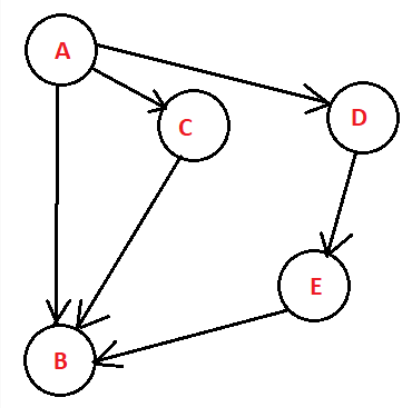

### Components of a DAG

1. **Nodes (Vertices)**: Each node in a DAG represents a variable in the analysis. This could be an observed data point, a latent variable, or an error term.

2. **Edges (Arrows)**: The edges represent causal relationships between the variables. An arrow from node A to node B indicates that A is presumed to have a causal effect on B.

3. **Acyclic**: "Acyclic" means that the graph does not contain any cycles. In other words, you cannot start at one node and follow a sequence of arrows that eventually loops back to the starting node.

### Principles of DAGs in Causal Inference

- **Causal Direction**: Arrows represent the direction of causation, suggesting that changes in the parent node (the start of the arrow) will result in changes in the child node (the end of the arrow).

- **Conditional Independence**: If two nodes are conditionally independent given a set of other nodes, there is no direct arrow connecting them once those other nodes are conditioned upon. This principle allows for the identification of confounders and selection biases.

- **d-separation**: This is a criterion for deciding, from the graph structure, whether a set of variables is conditionally independent of another set, given a third set. It's a fundamental tool for understanding the implications of a given DAG.

- **Path Blocking**: A path in a DAG can be "blocked" by conditioning on a variable that intercepts the path. This concept is used in identifying valid adjustment sets for estimating causal effects.

### Using DAGs for Causal Inference

1. **Modeling Assumptions**: DAGs make the causal assumptions explicit. By drawing a DAG, researchers specify their beliefs about the causal structure, including which variables are causes and effects, and which variables are confounders.

2. **Identifying Confounders**: DAGs help in identifying which variables need to be controlled for to estimate causal effects. If controlling for a variable blocks all back-door paths from the treatment to the outcome, it is part of an adequate adjustment set.

3. **Testing Causal Mechanisms**: They allow researchers to test the implications of different causal mechanisms by showing how interventions would affect the relationships depicted in the graph.

4. **Communicating Causal Theories**: DAGs serve as a clear and concise way to communicate complex causal theories, showing at a glance the assumed causal relationships among a set of variables.

In practice, creating a DAG requires substantial subject matter expertise. One needs to understand not just the data, but also the underlying processes that generate the data. While DAGs can be very powerful for designing studies and analyzing causal effects, they are limited by the accuracy of the assumptions they are based on. Incorrect assumptions about the direction of causation, omitted variables, or wrongly inferred conditional independencies can lead to incorrect conclusions.



Categorizing the variables as exogenous and endogenous helps clarify their roles in causal inference analyses. Endogenous variables are influenced by other variables within the system, while exogenous variables are not influenced by variables within the system and come from outside it.

Given the dataset related to weather conditions and predictions, we can categorize as:

### Exogenous Variables/ Confounding:
Exogenous variables are typically those that are not affected by other variables in the dataset but can influence them. In the context of weather data, it might be less straightforward to label variables as purely exogenous without more context (e.g., geographical location, time factors like season or part of the day not explicitly listed here). However, for the sake of exercise, we can consider external influences or assumptions on certain variables:

- `WindGustDir`: Direction of the strongest wind gust might be considered exogenous as it could be influenced by larger weather systems outside the local area of measurement.
- `WindDir9am`: Similar to `WindGustDir`, the wind direction at 9 AM is influenced by broader weather patterns.
- `WindDir3pm`: Like the other wind direction variables, it's influenced by larger meteorological conditions.

These variables are somewhat arbitrary without specific external factors listed in the dataset. In reality, most weather-related variables can be both endogenous and exogenous depending on the scope of the model and the external factors not accounted for in the dataset.

### Endogenous Variables:
Endogenous variables are influenced by other variables within the dataset. Most of the variables here can be considered endogenous since they interact within the weather system:

- `MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`
- `Rainfall`, `RainToday`, `RISK_MM`, `RainTomorrow`
- `Evaporation`, `Sunshine`
- `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`
- `Humidity9am`, `Humidity3pm`
- `Pressure9am`, `Pressure3pm`
- `Cloud9am`, `Cloud3pm`

In this context, variables like temperature, humidity, rainfall, etc., are all part of the interrelated weather system. They influence each other in complex ways, making them endogenous.

It's important to note that the distinction between exogenous and endogenous variables is not always clear-cut, especially in systems as complex as weather. Variables considered exogenous in one analysis might be endogenous in another, depending on the specific research question and the scope of the model. Additionally, the assumption about exogeneity or endogeneity should ideally be guided by domain knowledge and the specific aims of the analysis.

## Establishing Prior Knowledge with make_prior_knowledge()

The make_prior_knowledge function in the lingam package is used to incorporate domain knowledge into the causal discovery process when using the LiNGAM algorithm. This function allows you to specify which variables are believed to be exogenous (not caused by any other variable in the model) and to establish known causal relationships (paths) between variables.

Here's a breakdown of the parameters you're using in make_prior_knowledge:

**n_variables**: This is the total number of variables in your dataset. It should match the number of features you are analyzing with the LiNGAM model.

**exogenous_variables**: This is a list of indices corresponding to the variables you believe to be exogenous. In your code, you are referencing the indices for "WindGustDir", "WindDir9am", and "WindDir3pm" from the df_dict dictionary. These variables are considered not to be influenced by any other variables in your dataset.

**paths**: This parameter is used to specify the directional causal relationships between variables, which are represented as a list of lists (or tuples) where each sublist represents a causal path. Each path is an ordered pair (or a longer sequence) of indices where the first index is the cause and the second is the effect. For instance, (df_dict["MinTemp"], df_dict["MaxTemp"]) specifies that "MinTemp" has a causal influence on "MaxTemp".

We will use our knowledge to define prior knowledge

https://sciencing.com/characteristics-arid-climates-8441465.html

https://sciencing.com/barometric-pressure-snowstorms-23207.html

More Humidity ->  More chances of Rain ,
More Cloudy   ->  More chances of Rain,
High temp -> More Evaporation,
More Evaporation -> More Cloudy, 
More Evaporation -> More Humidity,
More Sunshine -> Less Cloudy,
Low Pressure -> More Cloudy

In [166]:
prior_knowledge = make_prior_knowledge(
    n_variables=n_variables,
    exogenous_variables=[df_dict["WindGustDir"], df_dict["WindDir9am"], df_dict["WindDir3pm"]],
    paths=[
        (df_dict["MaxTemp"], df_dict["Evaporation"]),      # High temp -> More Evaporation
        (df_dict["Evaporation"], df_dict["Humidity3pm"]),  # More Evaporation -> More Humidity
        (df_dict["Evaporation"], df_dict["Cloud3pm"]),     # More Evaporation -> More Cloudy
        (df_dict["Sunshine"], df_dict["Cloud3pm"]),        # More Sunshine -> Less Cloudy (inversely related)
        (df_dict["Cloud3pm"], df_dict["RainTomorrow"]),    # More Cloudy -> More chances of Rain
        (df_dict["Humidity3pm"], df_dict["RainTomorrow"]), # More Humidity -> More chances of Rain
        (df_dict["Pressure3pm"], df_dict["Cloud3pm"]),     # Low Pressure -> More Cloudy
        (df_dict["MinTemp"], df_dict["MaxTemp"]),          # Temp gradients (Min affecting Max Temp)
        (df_dict["Temp9am"], df_dict["Temp3pm"]),          # Temp across the day (Morning affecting Afternoon Temp)
        (df_dict["Humidity9am"], df_dict["Humidity3pm"]),  # Humidity gradients (Morning affecting Afternoon Humidity)
        (df_dict["Pressure9am"], df_dict["Pressure3pm"]),   # Pressure gradients (Morning affecting Afternoon Pressure)
        (df_dict["Cloud9am"], df_dict["Cloud3pm"]),        # Cloud cover gradients (Morning affecting Afternoon Cloudiness)
        (df_dict["WindSpeed9am"], df_dict["WindSpeed3pm"]), # Wind Speed gradients (Morning affecting Afternoon Wind Speed)
        (df_dict["RainToday"], df_dict["RainTomorrow"]),   # Rain today affecting Rain tomorrow
        (df_dict["RISK_MM"], df_dict["RainTomorrow"]),     # Risk of rain mm affecting Rain tomorrow (caution needed)
        (df_dict["Rainfall"], df_dict["RainToday"]),       # Rainfall affecting Rain today status
    ],
)


When initializing the DirectLiNGAM model in the lingam package, several parameters can be specified to control the behavior of the algorithm. Here's a brief explanation of the parameters you mentioned:

**random_state**: An integer seed for the random number generator to ensure reproducibility of the results. Specifying a fixed number (e.g., 42) makes the output deterministic, helping in debugging and comparison across different runs.

**measure**: Specifies the statistical measure to be used for independence testing within the algorithm. The 'pwling' option stands for Pairwise Likelihood Ratio Independence Nagging, a measure that is used to test the independence of variables. It's designed to be more robust in various situations, especially when dealing with non-Gaussian data.

**prior_knowledge**: An optional argument where you can input prior knowledge about the causal structure in a structured format. This can include information about which variables are exogenous, known causal relationships (paths), and any restrictions on the causal connections. Providing prior knowledge can guide the causal discovery process, making it more aligned with domain-specific insights and potentially improving the accuracy of the discovered causal model.

These parameters allow you to customize the DirectLiNGAM model to suit your data and the specific requirements of your causal analysis.

In [167]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en.values)

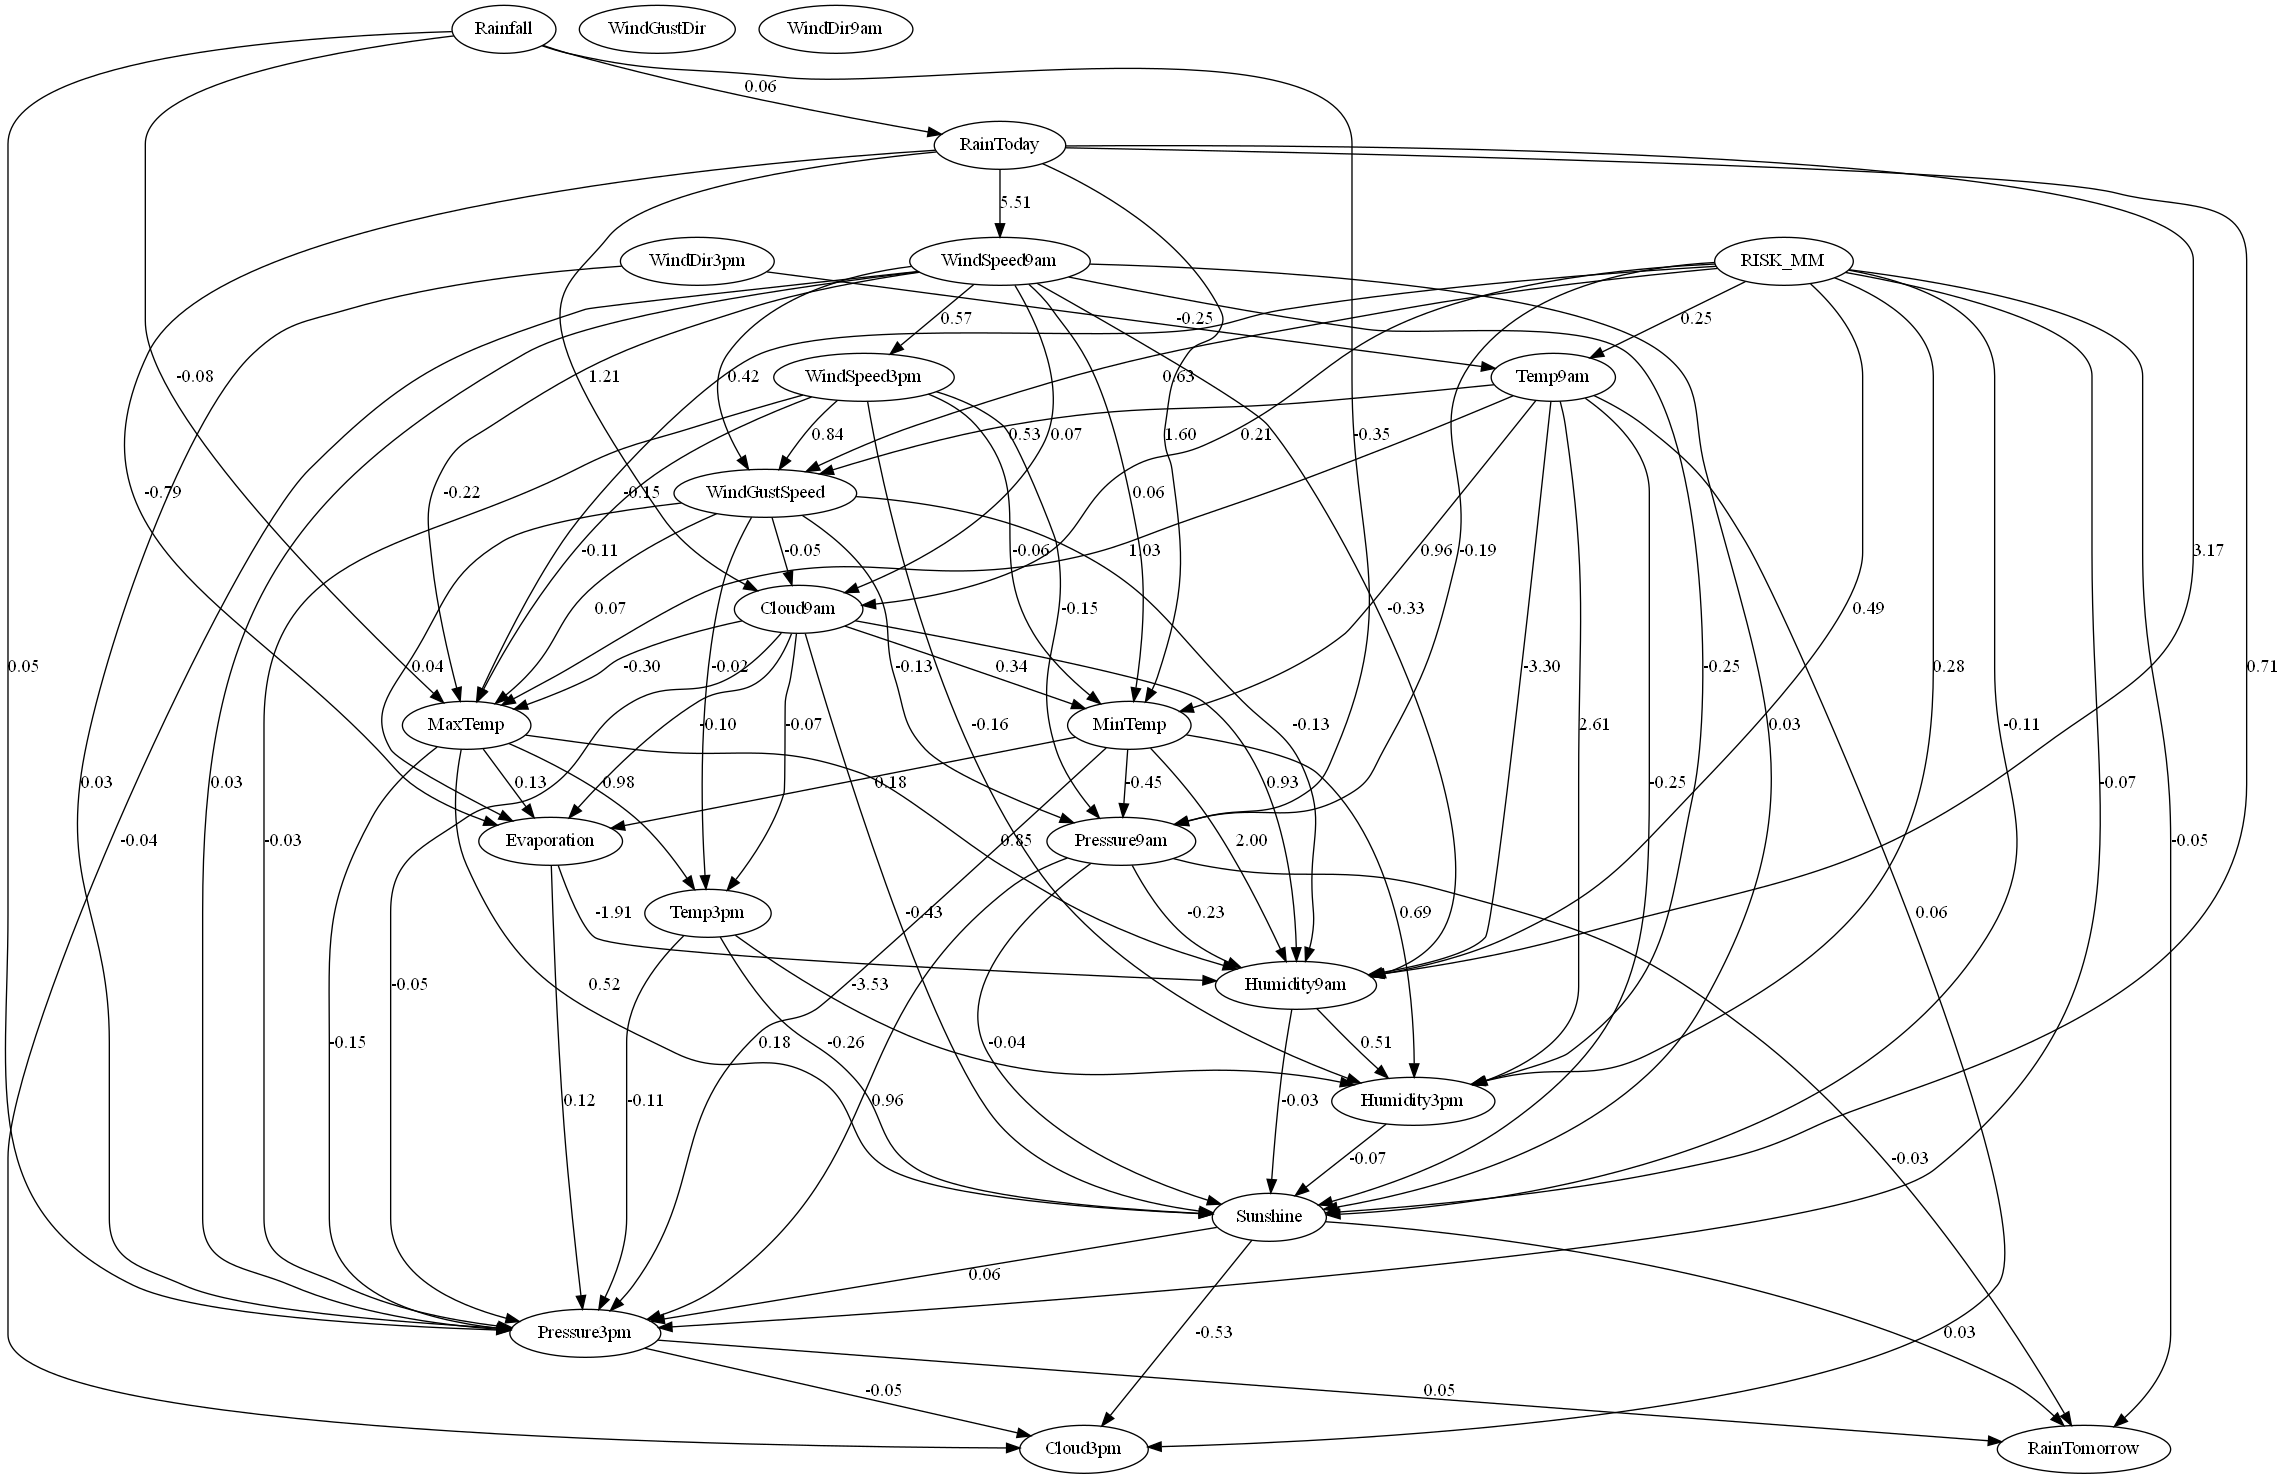

In [168]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

We have created a DAG for our model. This is on basis of our Assumptions.

From the DAG generate, the nodes (circles with variable names) represent different weather-related factors, such as temperature, humidity, and cloud cover. The directed edges (arrows) suggest a potential causal influence from one variable to another.

It's important to remember that the **presence of an edge in this graph does not confirm causality beyond doubt**; rather, it suggests a potential causal relationship that could be subject to further validation and testing. Moreover, such causal graphs are typically derived under certain assumptions — like the absence of unmeasured confounding, linearity of relationships, and non-Gaussian distribution of variables.

As I analyze this graph, I would look for the following:

Direct paths to 'RainTomorrow' that might be actionable in a predictive model.
Indirect paths that could indicate mediating variables or complex causal chains.
Any surprising or counterintuitive relationships that could warrant deeper investigation or might be artifacts of the data or the assumptions underlying the model.

## Interpreting Results
Interpret the statistical results in the context of our hypothesis. Look at the size and direction of the effect, and assess its significance.

In [169]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df_en.drop(["RainTomorrow"], axis=1), df_en["RainTomorrow"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


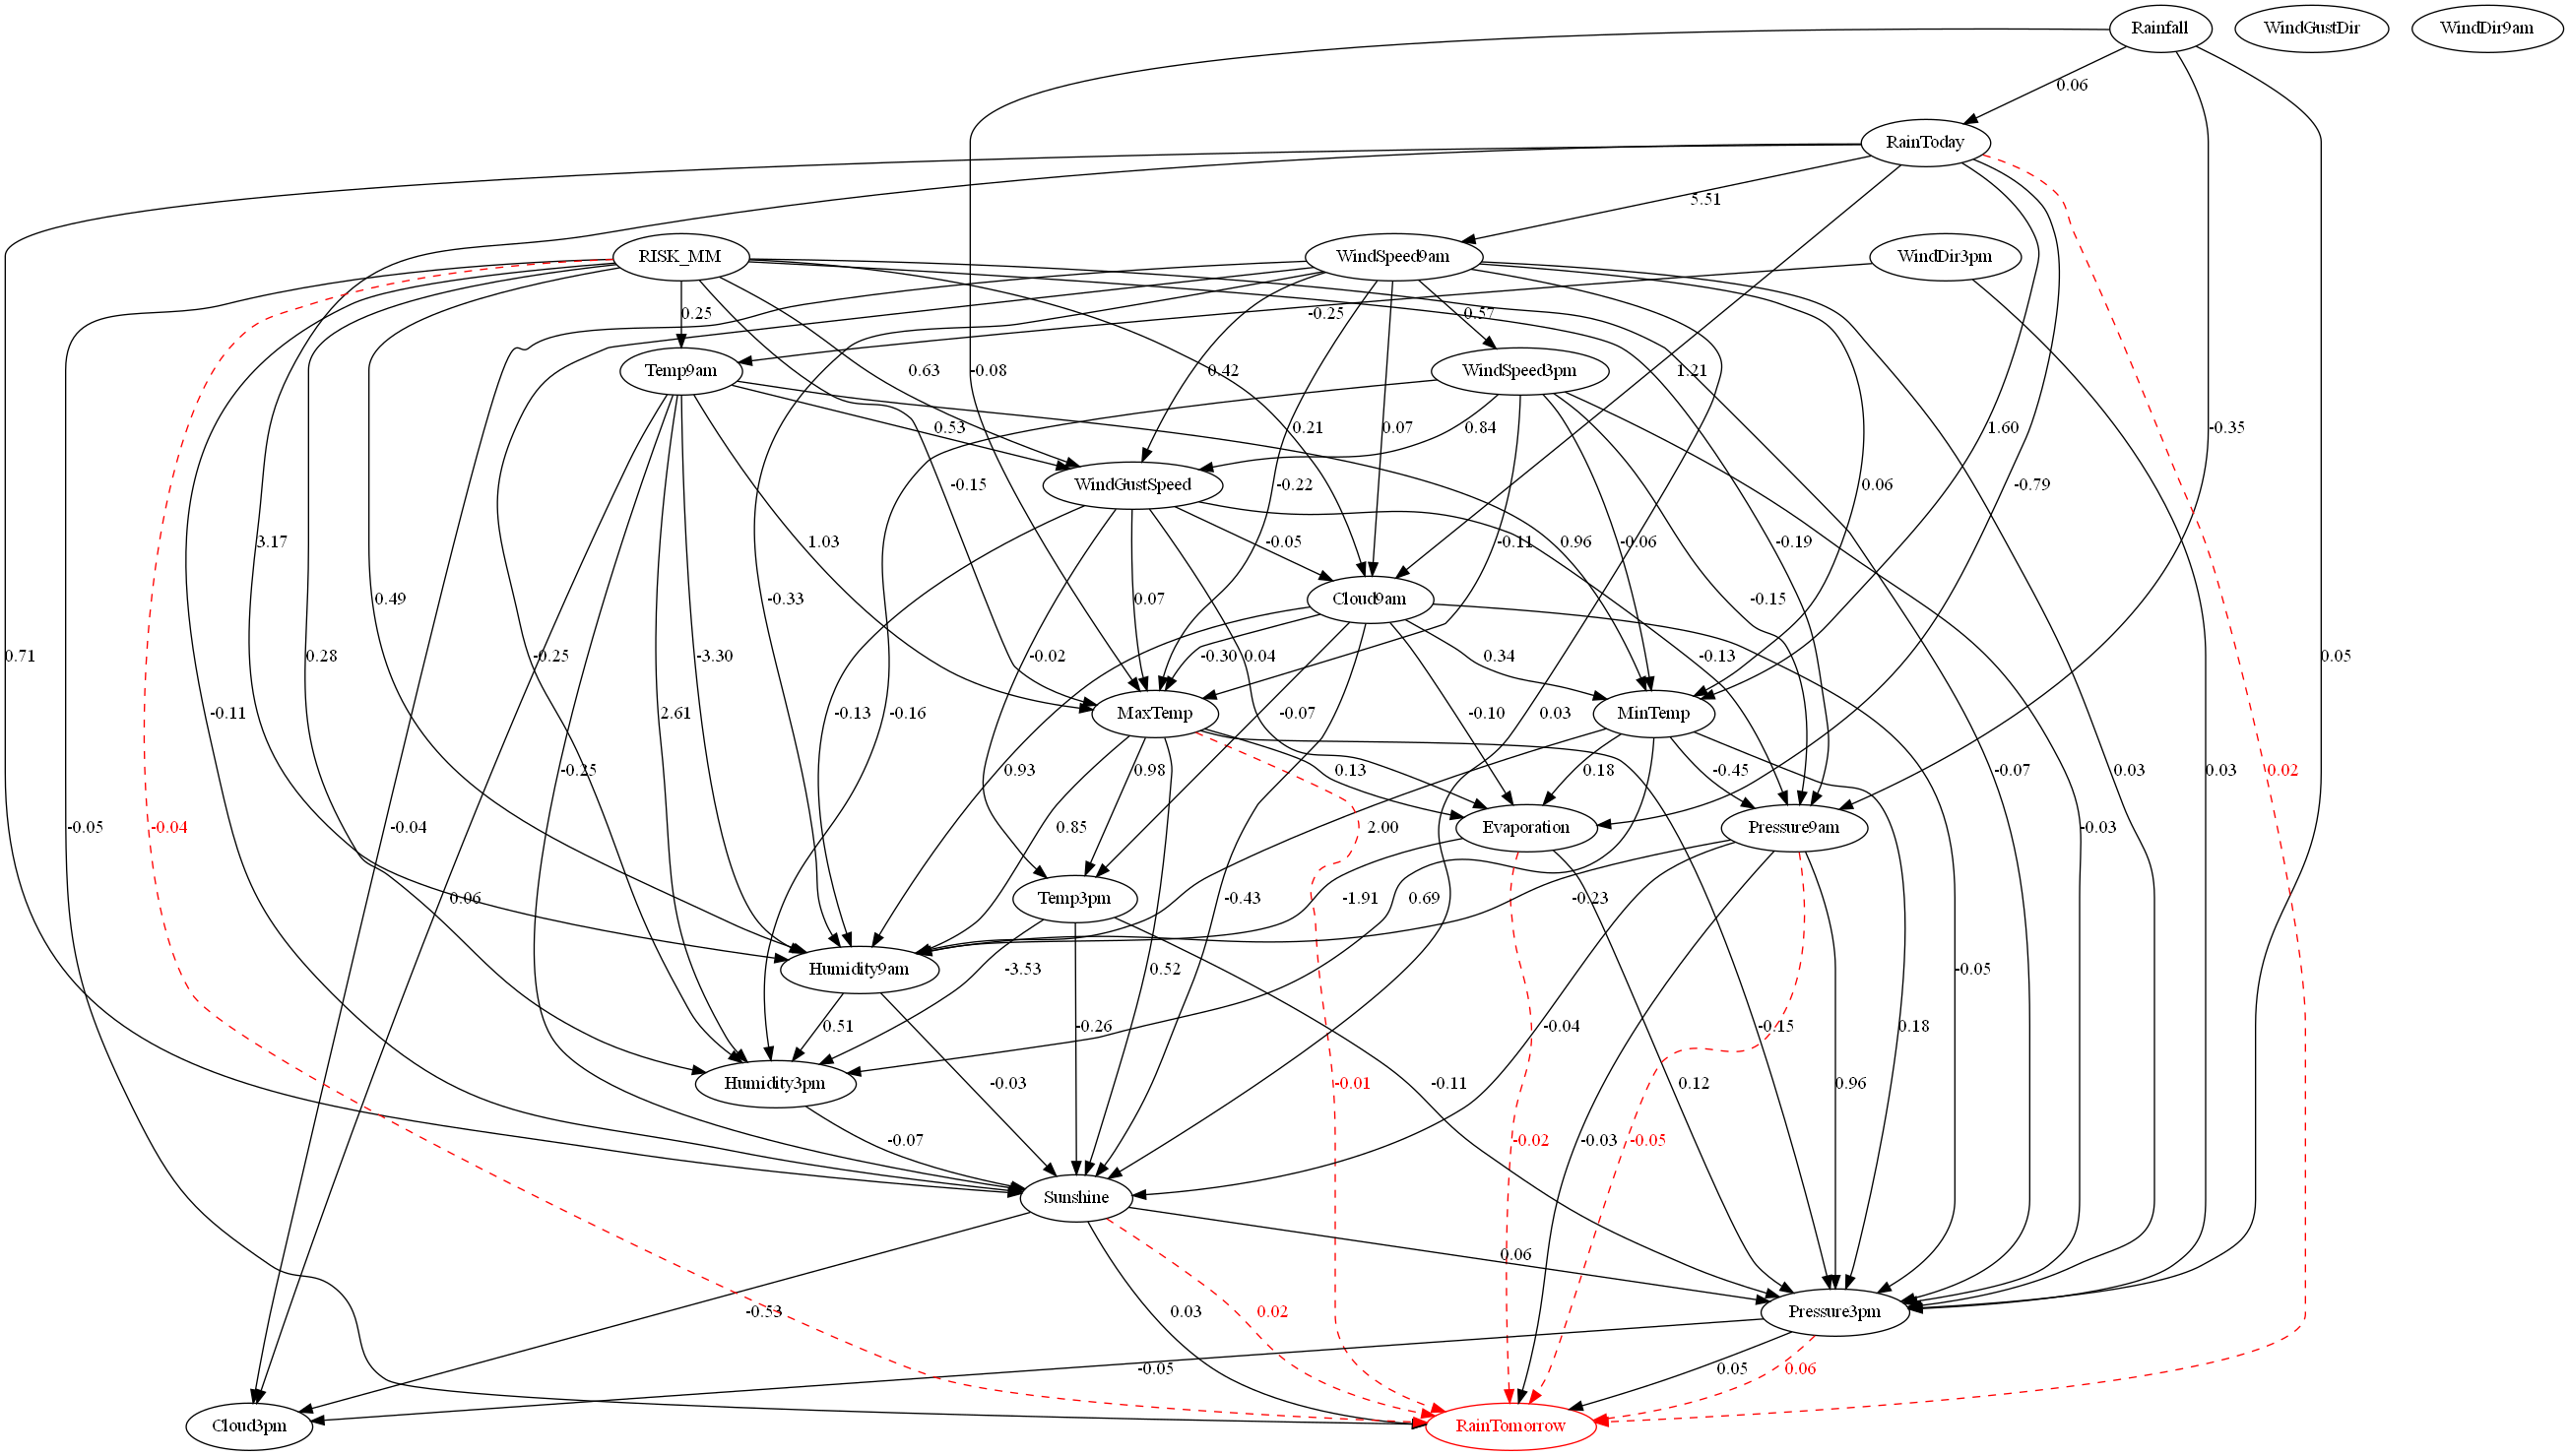

In [170]:
features = [i for i in range(df_en.drop(["RainTomorrow"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='RainTomorrow',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

**As can be seen from the above figure, all independent variables can be the cause of Rain Tomorrow, but effect is not that significant**

**LiNGAM requires linear relationships and non-Gaussianity but does not require a mix of categorical and numerical variables; it primarily deals with continuous data.**

So I need to remove categorical values. Before that we can explore how DAG look using logistic regression as Rain Tomorrow is Categorical


In [ ]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(df_en.drop(["RainTomorrow"], axis=1), df_en["RainTomorrow"])


In [171]:
# Extract the coefficients from the logistic regression model
log_reg_coefs = log_reg.coef_[0]  # Coefficients are in a 2D array, get the first row


In [172]:
# Generate a feature list without the target variable
features = [i for i in range(df_en.drop(["RainTomorrow"], axis=1).shape[1])]
print("features: ", features)

# Generate the dot object for visualization
dot = make_dot(
    np.zeros((len(features), len(features))),  # An adjacency matrix of zeros since we don't have one from logistic regression
    labels=df_en.drop(["RainTomorrow"], axis=1).columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='RainTomorrow',
    prediction_coefs=log_reg_coefs
)


features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


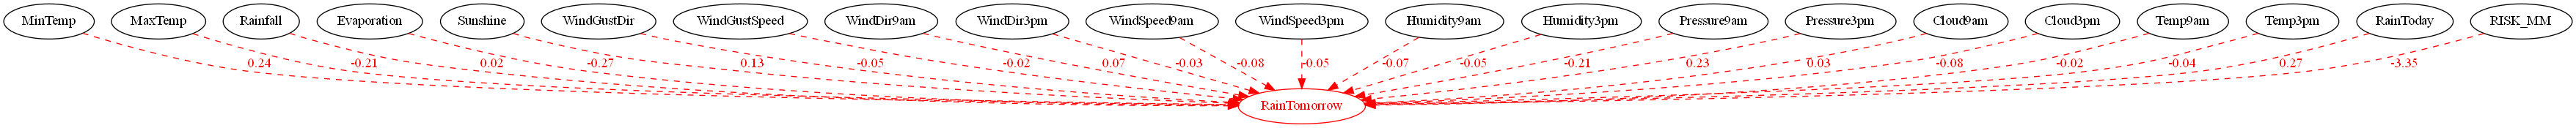

In [175]:
dot.format = 'png'
dot.render('logistic_regression_dag')
Image("logistic_regression_dag.png", width=1200, height=1000)

**Risk_MM contributes more to RainTommorrow**. In future, I will work with Logistic Regression for this data and check validity of this model.

Lets start with new approach

In [176]:
columns_to_remove = ['RainToday', 'RainTomorrow', 'WindDir9am', 'WindDir3pm', 'WindGustDir']
df1= df1.drop(columns=columns_to_remove)

df1.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      8.0     24.3       0.0          3.4       6.3           30.0   
1     14.0     26.9       3.6          4.4       9.7           39.0   
2     13.7     23.4       3.6          5.8       3.3           85.0   
3     13.3     15.5      39.8          7.2       9.1           54.0   
4      7.6     16.1       2.8          5.6      10.6           50.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           6.0            20           68           29       1019.7   
1           4.0            17           80           36       1012.4   
2           6.0             6           82           69       1009.5   
3          30.0            24           62           56       1005.5   
4          20.0            28           68           49       1018.3   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0       1015.0         7         7     14.4     23.6      3.6  
1       1008.4         5         3     17.5     25.7      3.6  
2       1007.2         8         7     15.4     20.2     39.8  
3       1007.0         2         7     13.5     14.1      2.8  
4       1018.5         7         7     11.1     15.4      0.0

In [177]:
oe = ce.ordinal.OrdinalEncoder(
    cols=df1.select_dtypes(include="object")
    )

df_en = oe.fit_transform(df1)
n_variables = df_en.shape[1]

In [178]:
df_list = df1.columns.to_list()
df_dict = {}

for i, column in zip(range(len(df_list)), df_list):
    df_dict[column] = i

print(len(df_list))
print(df_dict)

17
{'MinTemp': 0, 'MaxTemp': 1, 'Rainfall': 2, 'Evaporation': 3, 'Sunshine': 4, 'WindGustSpeed': 5, 'WindSpeed9am': 6, 'WindSpeed3pm': 7, 'Humidity9am': 8, 'Humidity3pm': 9, 'Pressure9am': 10, 'Pressure3pm': 11, 'Cloud9am': 12, 'Cloud3pm': 13, 'Temp9am': 14, 'Temp3pm': 15, 'RISK_MM': 16}


In [179]:
prior_knowledge = make_prior_knowledge(
    n_variables=n_variables,
    exogenous_variables=[df_dict["Pressure9am"], df_dict["Pressure3pm"]],
    paths=[
        (df_dict["MaxTemp"], df_dict["Evaporation"]),      # High temp -> More Evaporation
        (df_dict["Evaporation"], df_dict["Humidity3pm"]),  # More Evaporation -> More Humidity
        (df_dict["Evaporation"], df_dict["Cloud3pm"]),     # More Evaporation -> More Cloudy
        (df_dict["Sunshine"], df_dict["Cloud3pm"]),        # More Sunshine -> Less Cloudy (inversely related)
        (df_dict["MinTemp"], df_dict["MaxTemp"]),          # Temp gradients (Min affecting Max Temp)
        (df_dict["Temp9am"], df_dict["Temp3pm"]),          # Temp across the day (Morning affecting Afternoon Temp)
        (df_dict["Humidity9am"], df_dict["Humidity3pm"]),  # Humidity gradients (Morning affecting Afternoon Humidity)
        (df_dict["Cloud9am"], df_dict["Cloud3pm"]),        # Cloud cover gradients (Morning affecting Afternoon Cloudiness)
        (df_dict["WindSpeed9am"], df_dict["WindSpeed3pm"]), # Wind Speed gradients (Morning affecting Afternoon Wind Speed)

    ],
)


In [180]:
model = lingam.DirectLiNGAM(
                    random_state=42,
                    measure = 'pwling',
                    prior_knowledge = prior_knowledge
                    )

model.fit(df_en.values)

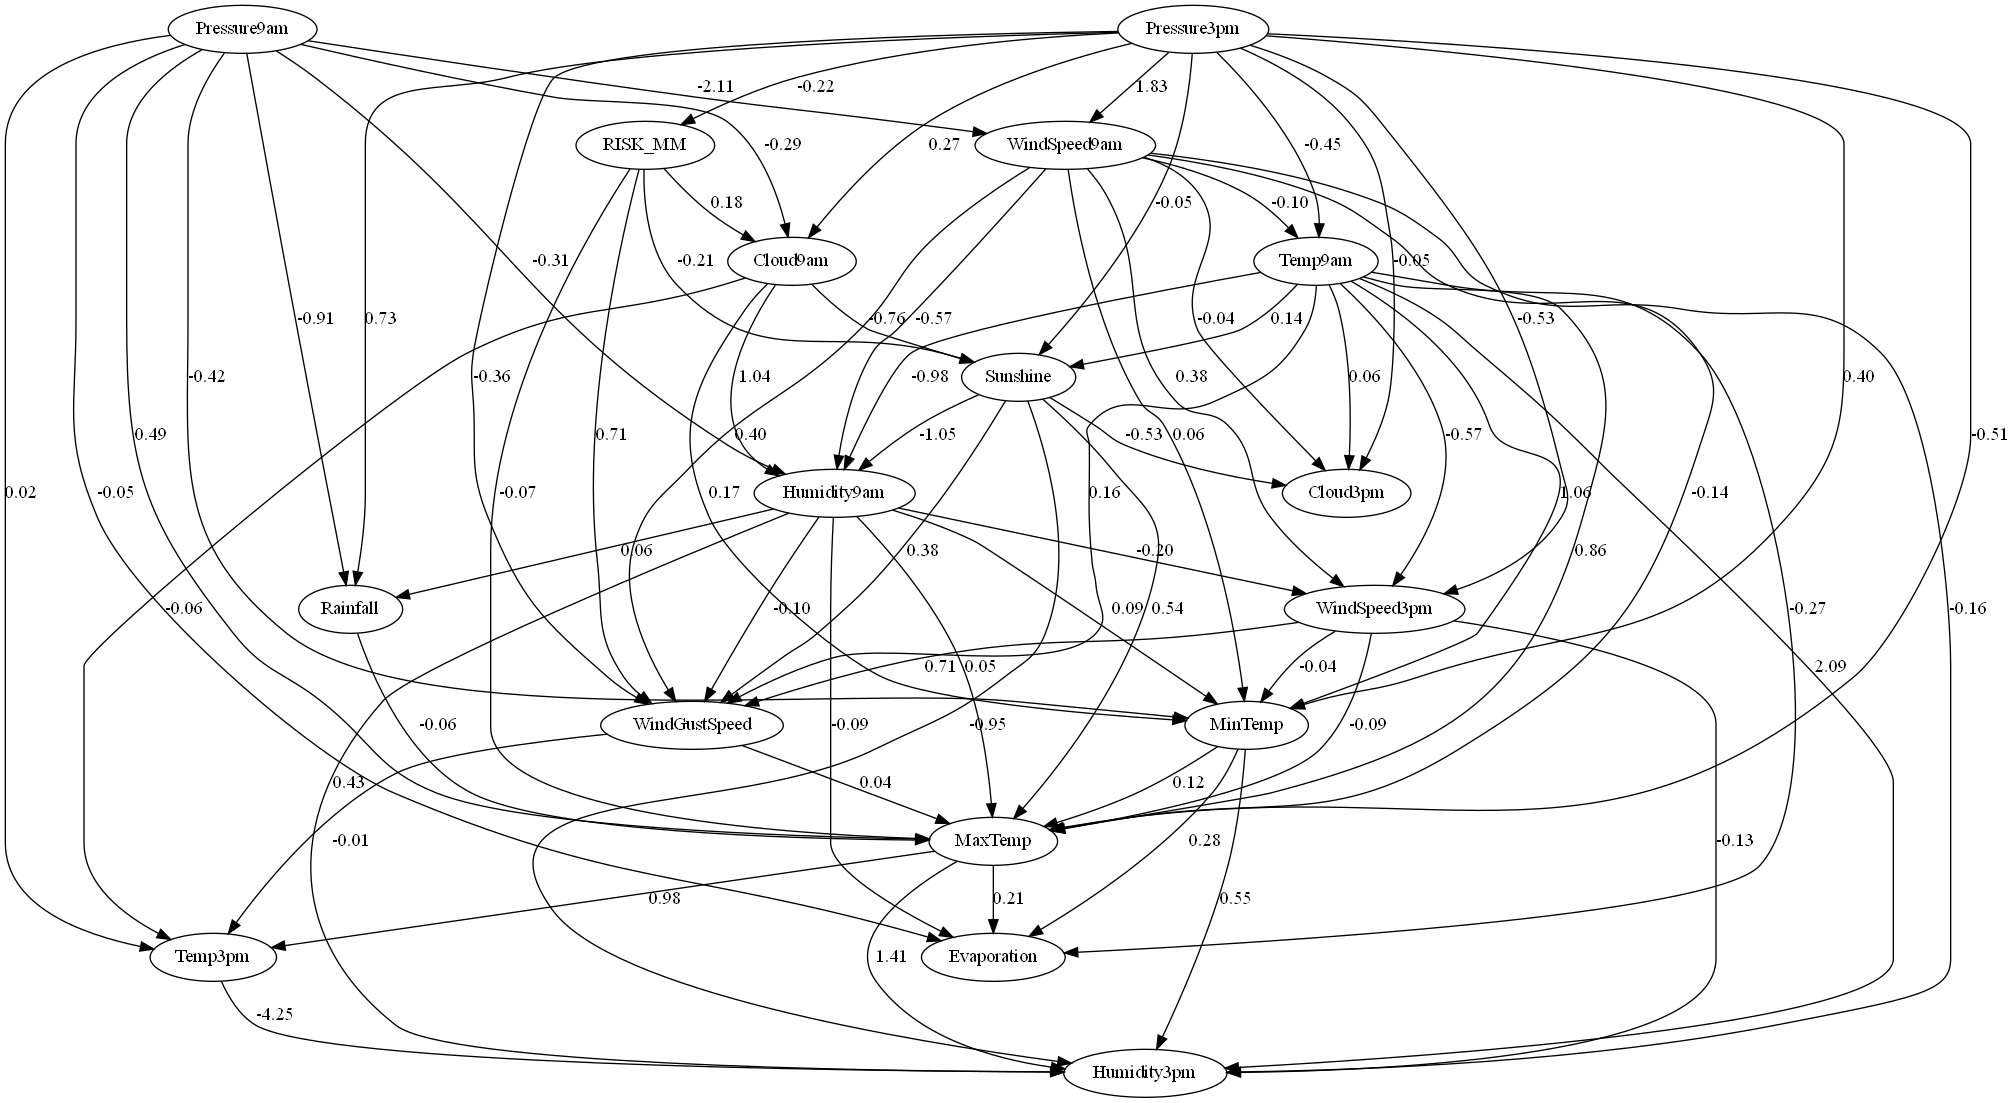

In [181]:
dot = make_dot(
    model.adjacency_matrix_,
     labels=df_en.columns.to_list(),
    )


dot.format = 'png'
dot.render('dag')

Image("dag.png")

**We can see that in DAG generated, edge weight has improved.** I think that this will generate more biased model

In [182]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df_en.drop(["Humidity3pm"], axis=1), df_en["Humidity3pm"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


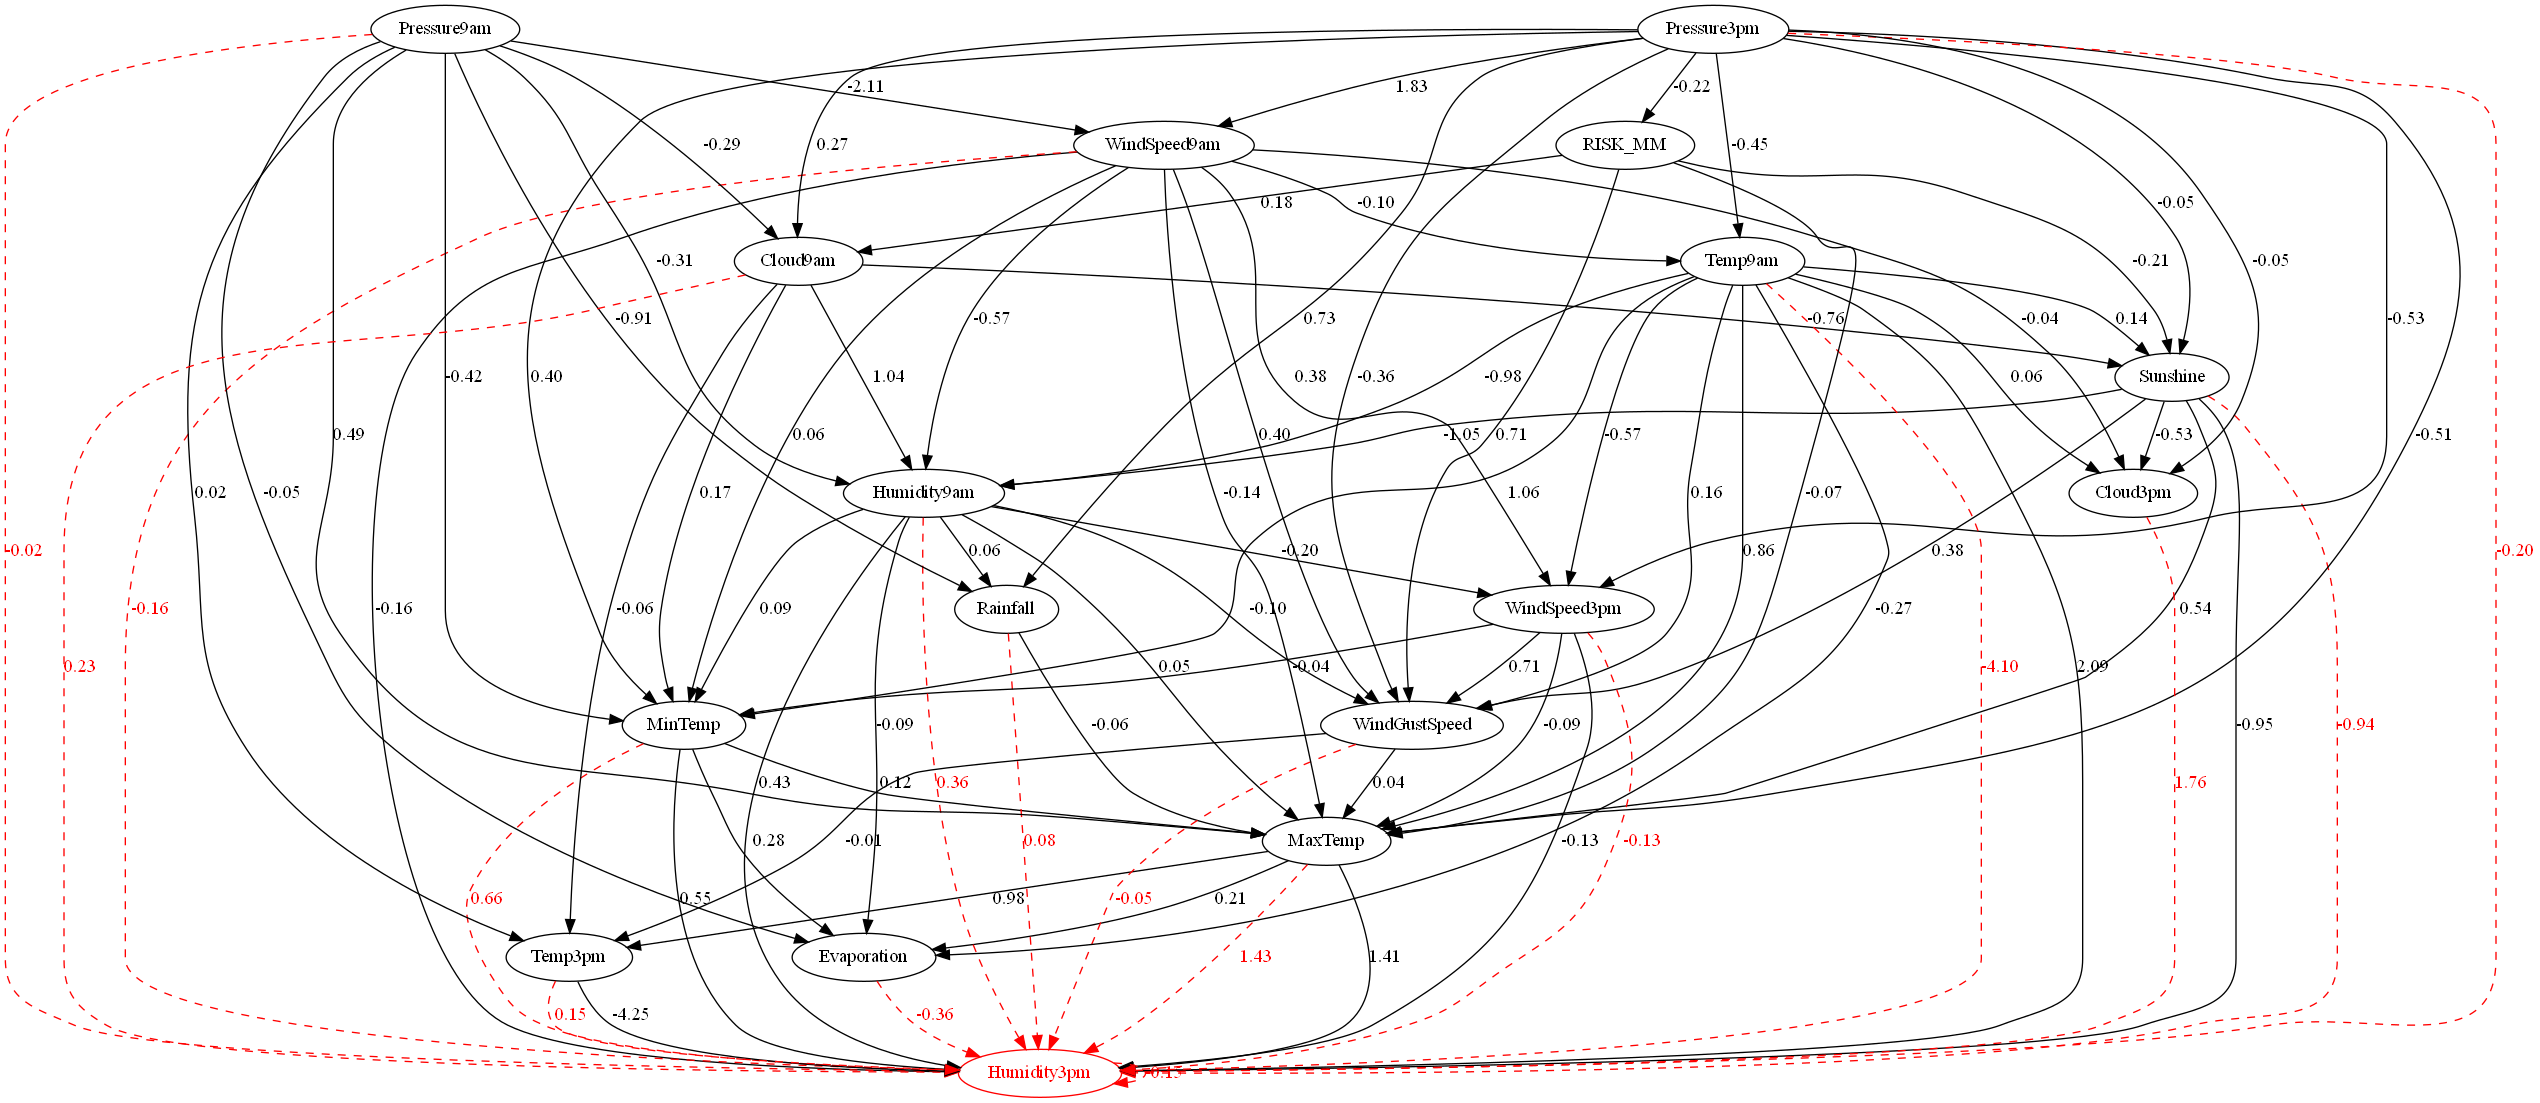

In [183]:
features = [i for i in range(df_en.drop(["Humidity3pm"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='Humidity3pm',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

**As can be seen from the above figure, all independent variables can be the cause of change in Humidity3pm**

**Surprising Temp9am has the greatest impact with the highest coefficient. It impacts negatively on Humidity**

In [184]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(df_en.drop(["Temp3pm"], axis=1), df_en["Temp3pm"])

LinearRegression()

features:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


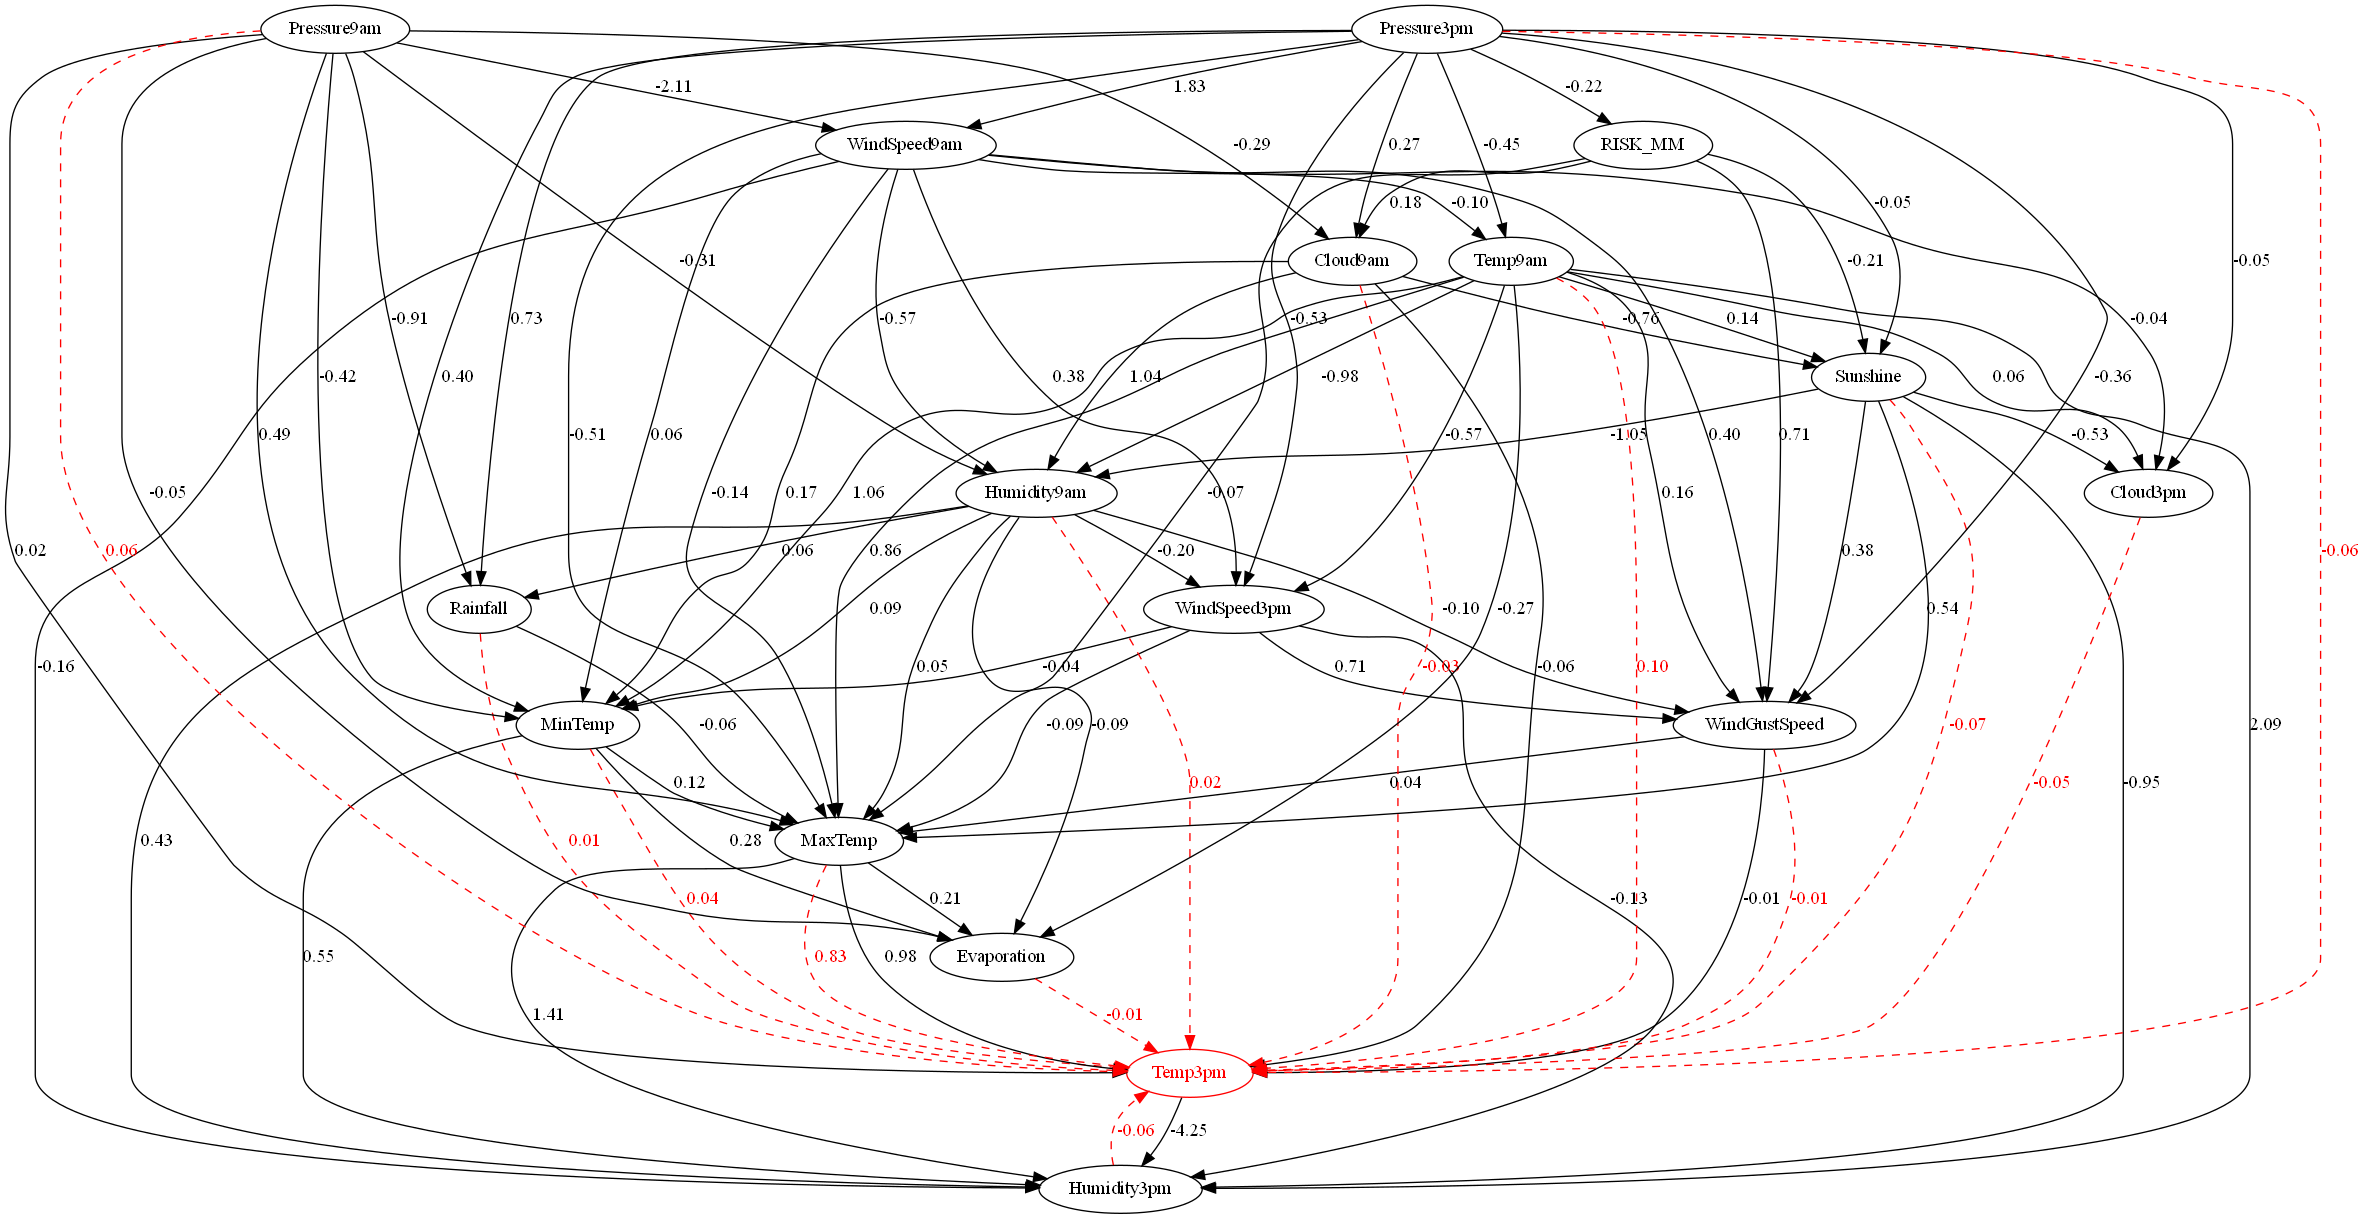

In [185]:
features = [i for i in range(df_en.drop(["Temp3pm"], axis=1).shape[1])]
print("features: ", features)

dot = make_dot(
    model.adjacency_matrix_,
    labels=df_en.columns.to_list(),
    prediction_feature_indices=features,
    prediction_target_label='Temp3pm',
    prediction_coefs=reg.coef_
    )

dot.format = 'png'
dot.render('dag')

Image("dag.png")

**We can see that Cloud9am affects Temp3pm negatively which is infact true.**

## Conclusion

In conclusion, this notebook has illuminated the critical role of causal inference within the realms of data science and machine learning. Throughout this course, we've delved into various aspects of causality, ranging from foundational principles such as the distinction between correlation and causation, to more advanced concepts like potential outcomes, counterfactual reasoning, and the utilization of Directed Acyclic Graphs (DAGs). Our exploration of these concepts has equipped us with a deeper understanding of how to discern and model causal relationships in data, an increasingly essential skill in our data-centric world.

The Weather Causal Inference study, leveraging the LiNGAM (Linear Non-Gaussian Acyclic Model) approach, stands as a prime example of applying these principles in practice. Initially, my understanding of LiNGAM was flawed, but through errors and further exploration, I've significantly enhanced my comprehension. In the future, I aim to experiment with fitting the model using Logistic Regression for predicting "RainTomorrow." The decision to remove categorical data from the dataset for the application of LiNGAM has refined our approach to causal inference, enabling us to establish causal relationships, particularly with humidity, more effectively.

This case study has not only demonstrated the application of causal analysis to real-world scenarios but has also underscored its importance in deriving actionable insights. By identifying the causal factors that influence weather patterns, we've acquired a nuanced understanding that transcends simple predictive accuracy. This deeper insight fosters more informed policy-making and strategic interventions, highlighting the transformative power of causal inference in tackling complex challenges across society.

Taking all of these insights into account, it's clear that causal inference represents a significant advancement beyond traditional machine learning methods. By addressing the limitations inherent in correlation-based approaches, causal inference offers a robust framework for solving a myriad of challenges, paving the way for a deeper, more accurate understanding of the causal dynamics at play in our increasingly complex world.

## Reference

https://www.tablab.app/datasets/sample/tsv

https://sciencing.com/characteristics-arid-climates-8441465.html 

https://sciencing.com/barometric-pressure-snowstorms-23207.html 

https://towardsdatascience.com/a-complete-guide-to-causal-inference-8d5aaca68a47?gi=01e28a8f746a

https://sciencenotes.org/what-is-a-confounding-variable-definition-and-examples/

https://www.kdnuggets.com/2021/03/causal-design-patterns.html